# Crater chronology

There is extensive documentation on cratering size-frequency distribution analysis applied to cratering chronology.

This notebook is just to exemplify some applications based on publicly available datasets and tools. 

<div class="alert alert-block alert-info">
    NOTE: The approach presented could be use for real-life applications, e.g. with own maps and crater counts. Interactivity might be needed, though, e.g. with desktop GIS (such as Qgis). In the examples below no detailed verification has been performed, e.g. in the crater size-frequency distribution of Crisium some spurious craters migth be there, as well as heterogeneous populations, among several possible effects.
    
   Please consider it only an exemplification of the steps using a reproducible jupyter approach.
</div>

Specific cratering tutorials:

* G. Michael (2022) Open Source Tools for crater counting,  2nd GMAP Winter School - https://youtu.be/yg_XEa8lks0
  * see also references on https://github.com/ggmichael/craterstats#references
* G. Michael (2012) FU Workshop - https://pdsimage2.wr.usgs.gov/pub/pigpen/tutorials/FreieUni_Workshop2012/

See also:

* References: https://github.com/aprossi/impact-cratering/blob/main/references.md
* Data sources: https://github.com/aprossi/impact-cratering/tree/main/data (also included in [Planetary craters](./planetary_craters.ipynb)
* Sofware tools: https://github.com/aprossi/impact-cratering/blob/main/links.md#code-and-tools
  * in particular https://github.com/ggmichael/craterstats


In [1]:
# radii, you can fix as neeeded
# see also https://raw.githubusercontent.com/pdssp/csvforwkt/main/data/naifcodes_radii_m_wAsteroids_IAU2015.csv

r_mercury = 2439400 # 2439700(IAU)
r_venus = 6051000 # 6051800 (IAU )
r_moon = 1737400 
r_mars = 3396190 #(large semimajor)
r_ceres = 470000  # 476200 (IAU )
r_titan = 2575000  # 2574730 (IAU )
r_europa = 1560800 # 1560800 (IAU )
r_callisto = 2410300 # 2410300 (IAU )
r_ganymede = 2632345 # 2631200 (IAU )

See also demo commands on

https://github.com/ggmichael/craterstats/blob/main/src/craterstats/config/demo_commands.txt


In [3]:
import os
from sh import craterstats


craterstats_help=(craterstats('-h'))
craterstats_chronology_systems=(craterstats('-lcs'))
craterstats_symbols_and_colours=(craterstats('-lpc'))  
craterstats_about =(craterstats('-about'))  



# uncomment the line below in case, to ese the help as provied on a terminal CLI
# print(craterstats_help)


## Using cratersats with sh

see also Michael (2021), e.g.

```
python craterstats.py -cs 3 -ep 2 -ef 1 -title Differential plot with Poisson age evaluations, -subtitle equilibrium function, and epoch system -p source=craterstats/sample/Pickering.scc -p type=poisson,range=[2,5],offset_age=[2,-2] -p range=[.2,.7]

python craterstats.py -pi 1 -cs 3 -title Cumulative fits showing resurfacing correction -subtitle and fitted isochrons -p source=craterstats/sample/Pickering.scc,psym=1 -p type=c-fit,range=[2,5],isochron=1 -p range=[.2,.7],resurf=1,psym=10

python craterstats.py -pi 4 -cs 6 --equilibrium 2 -title Hartmann style plot -subtitle with H&D 2016 production function -isochrons 4s,3.7s,3s,1,.1,.01,.001,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9 -p source=craterstats/sample/Pickering.scc,psym=1

python craterstats.py -pi 5 -ep 2 -cs 3 -title Chronology function -subtitle with Mars epochs and transition times
```

In [4]:
!ls ./*ipynb

./crater_chronology.ipynb  ./planetary_craters.ipynb
./crater_databases.ipynb   ./scratch.ipynb
./crater_morphometry.ipynb


### Plotting Lunar chronology function

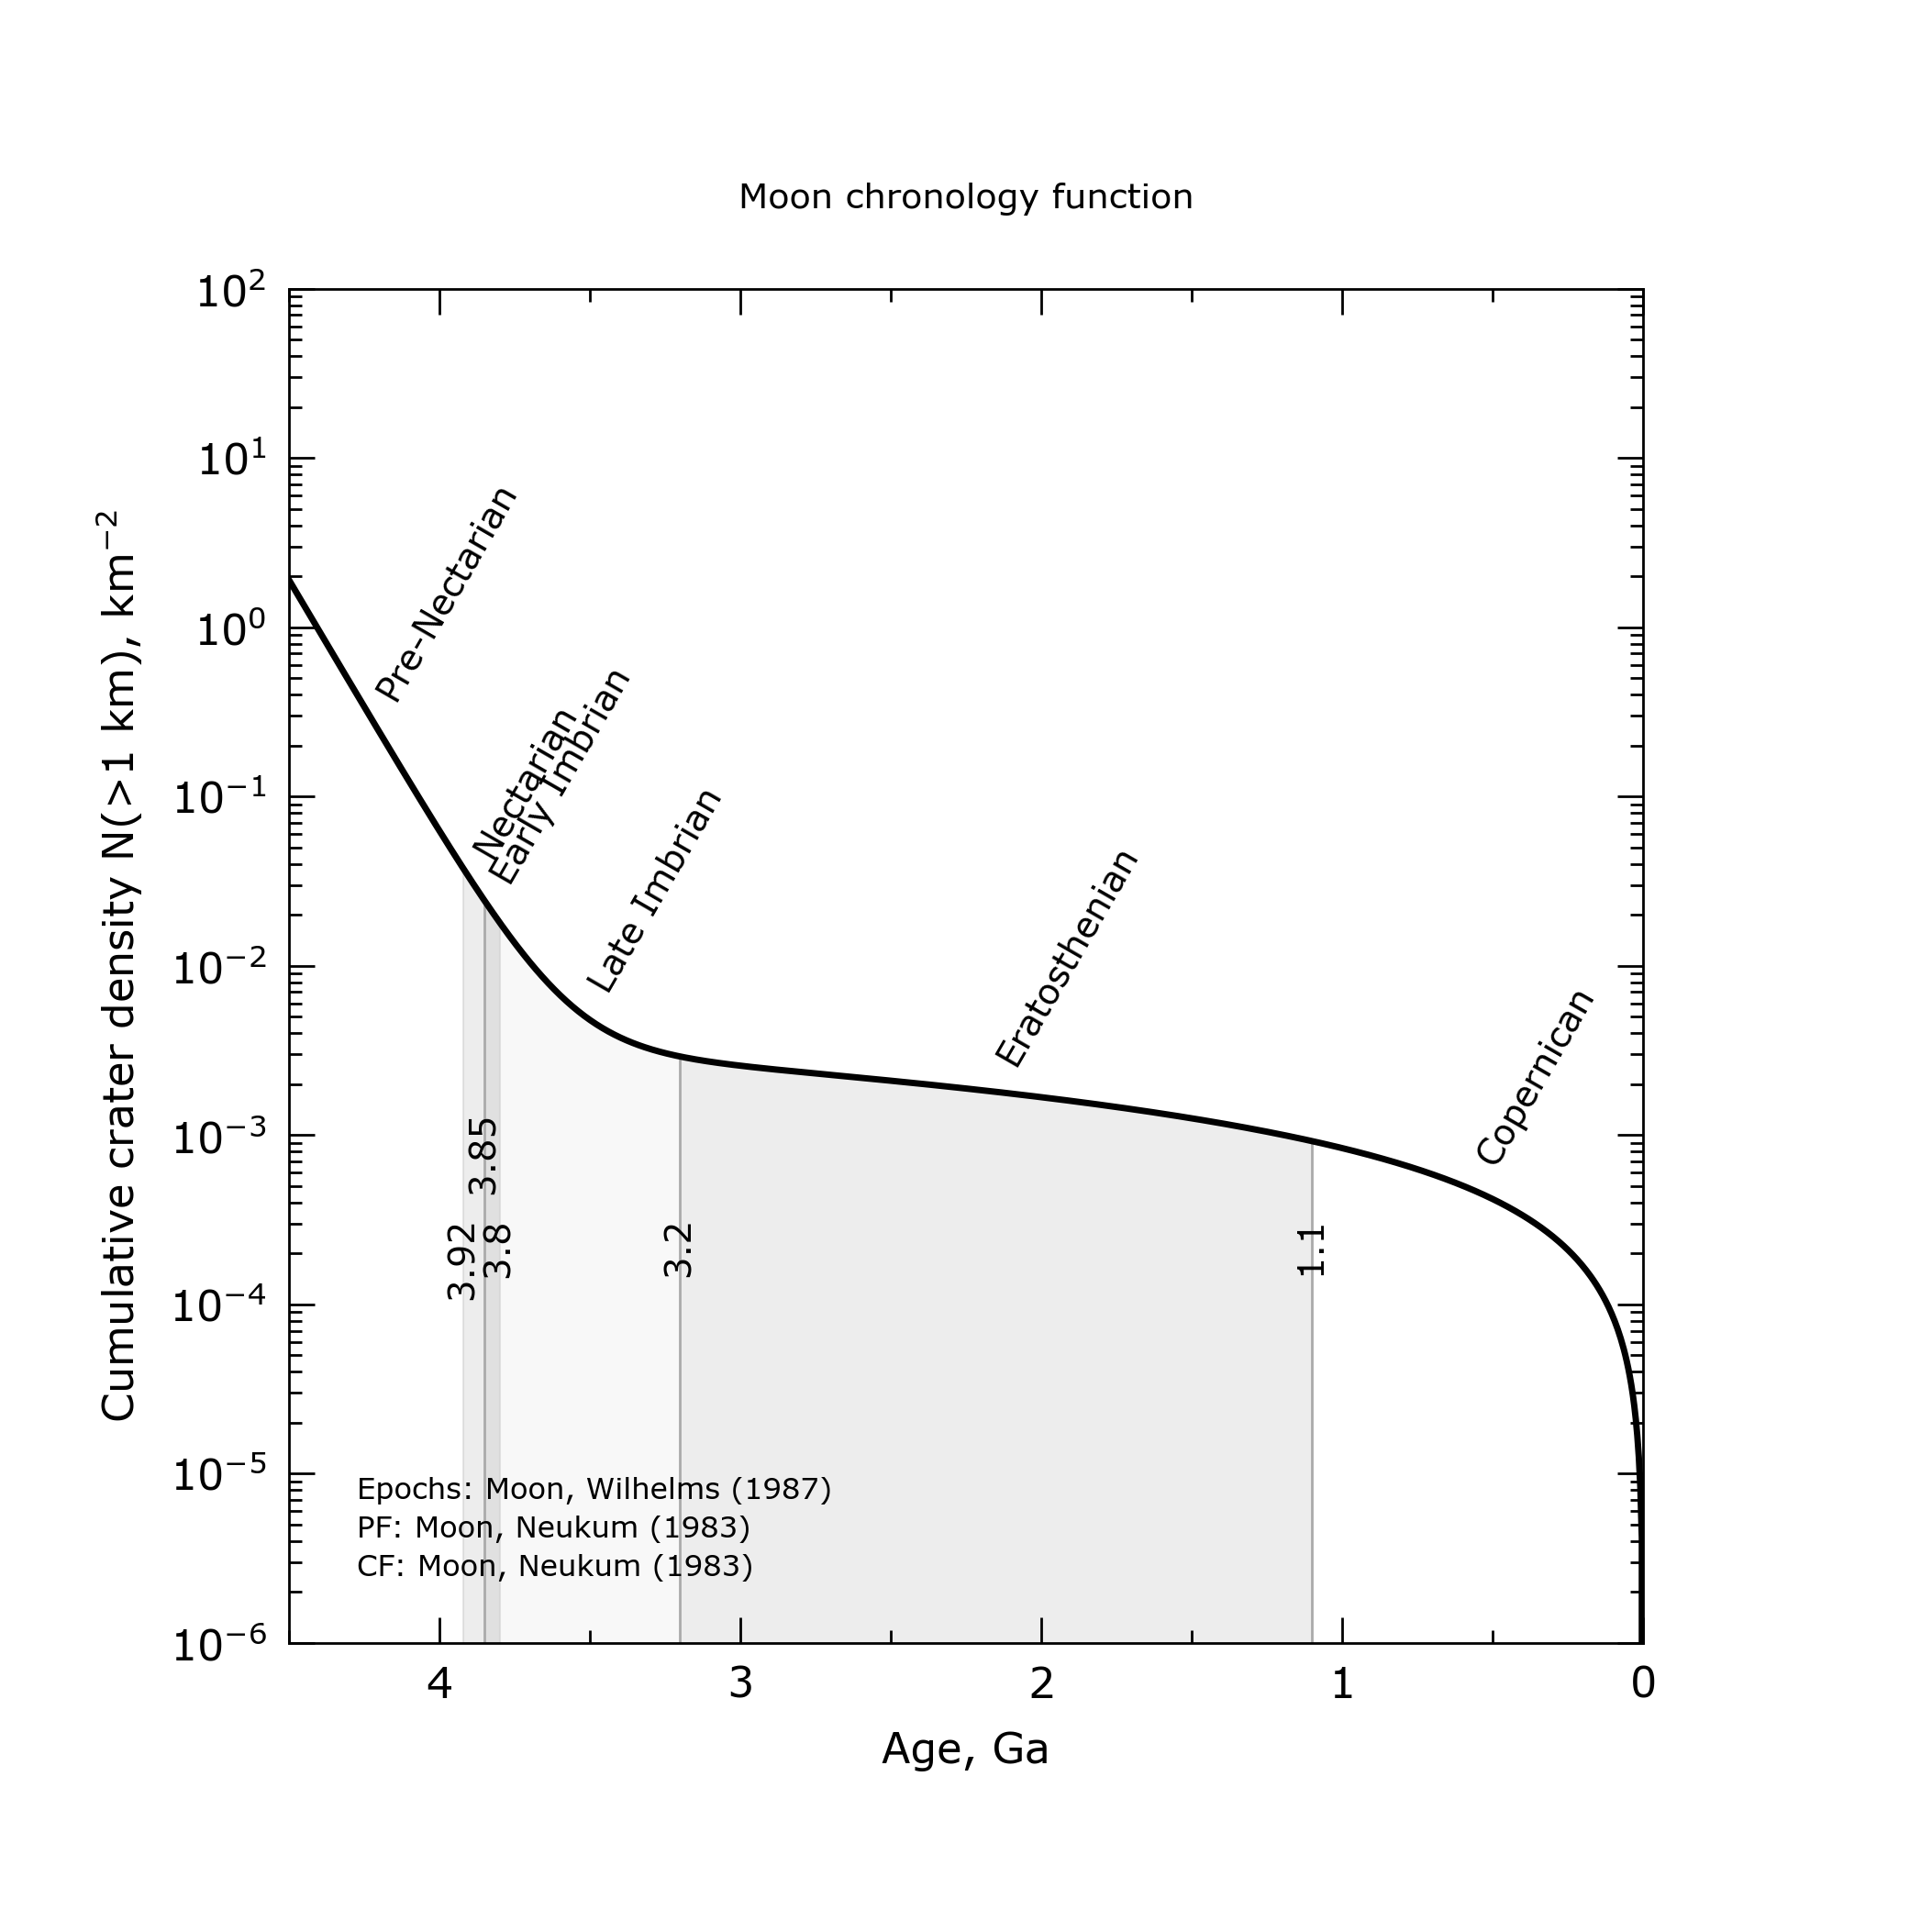

In [5]:
###$ Mars chronology
path = './'
craterstats([
 "-pr",
 "chronology", 
 "-ep", 
 "moon", 
 "-title", 
 "Moon chronology function"])


from IPython import display
display.Image("./out.png", width=800)

In [6]:
os.remove("./out.png")

### Plotting Mars chronology function

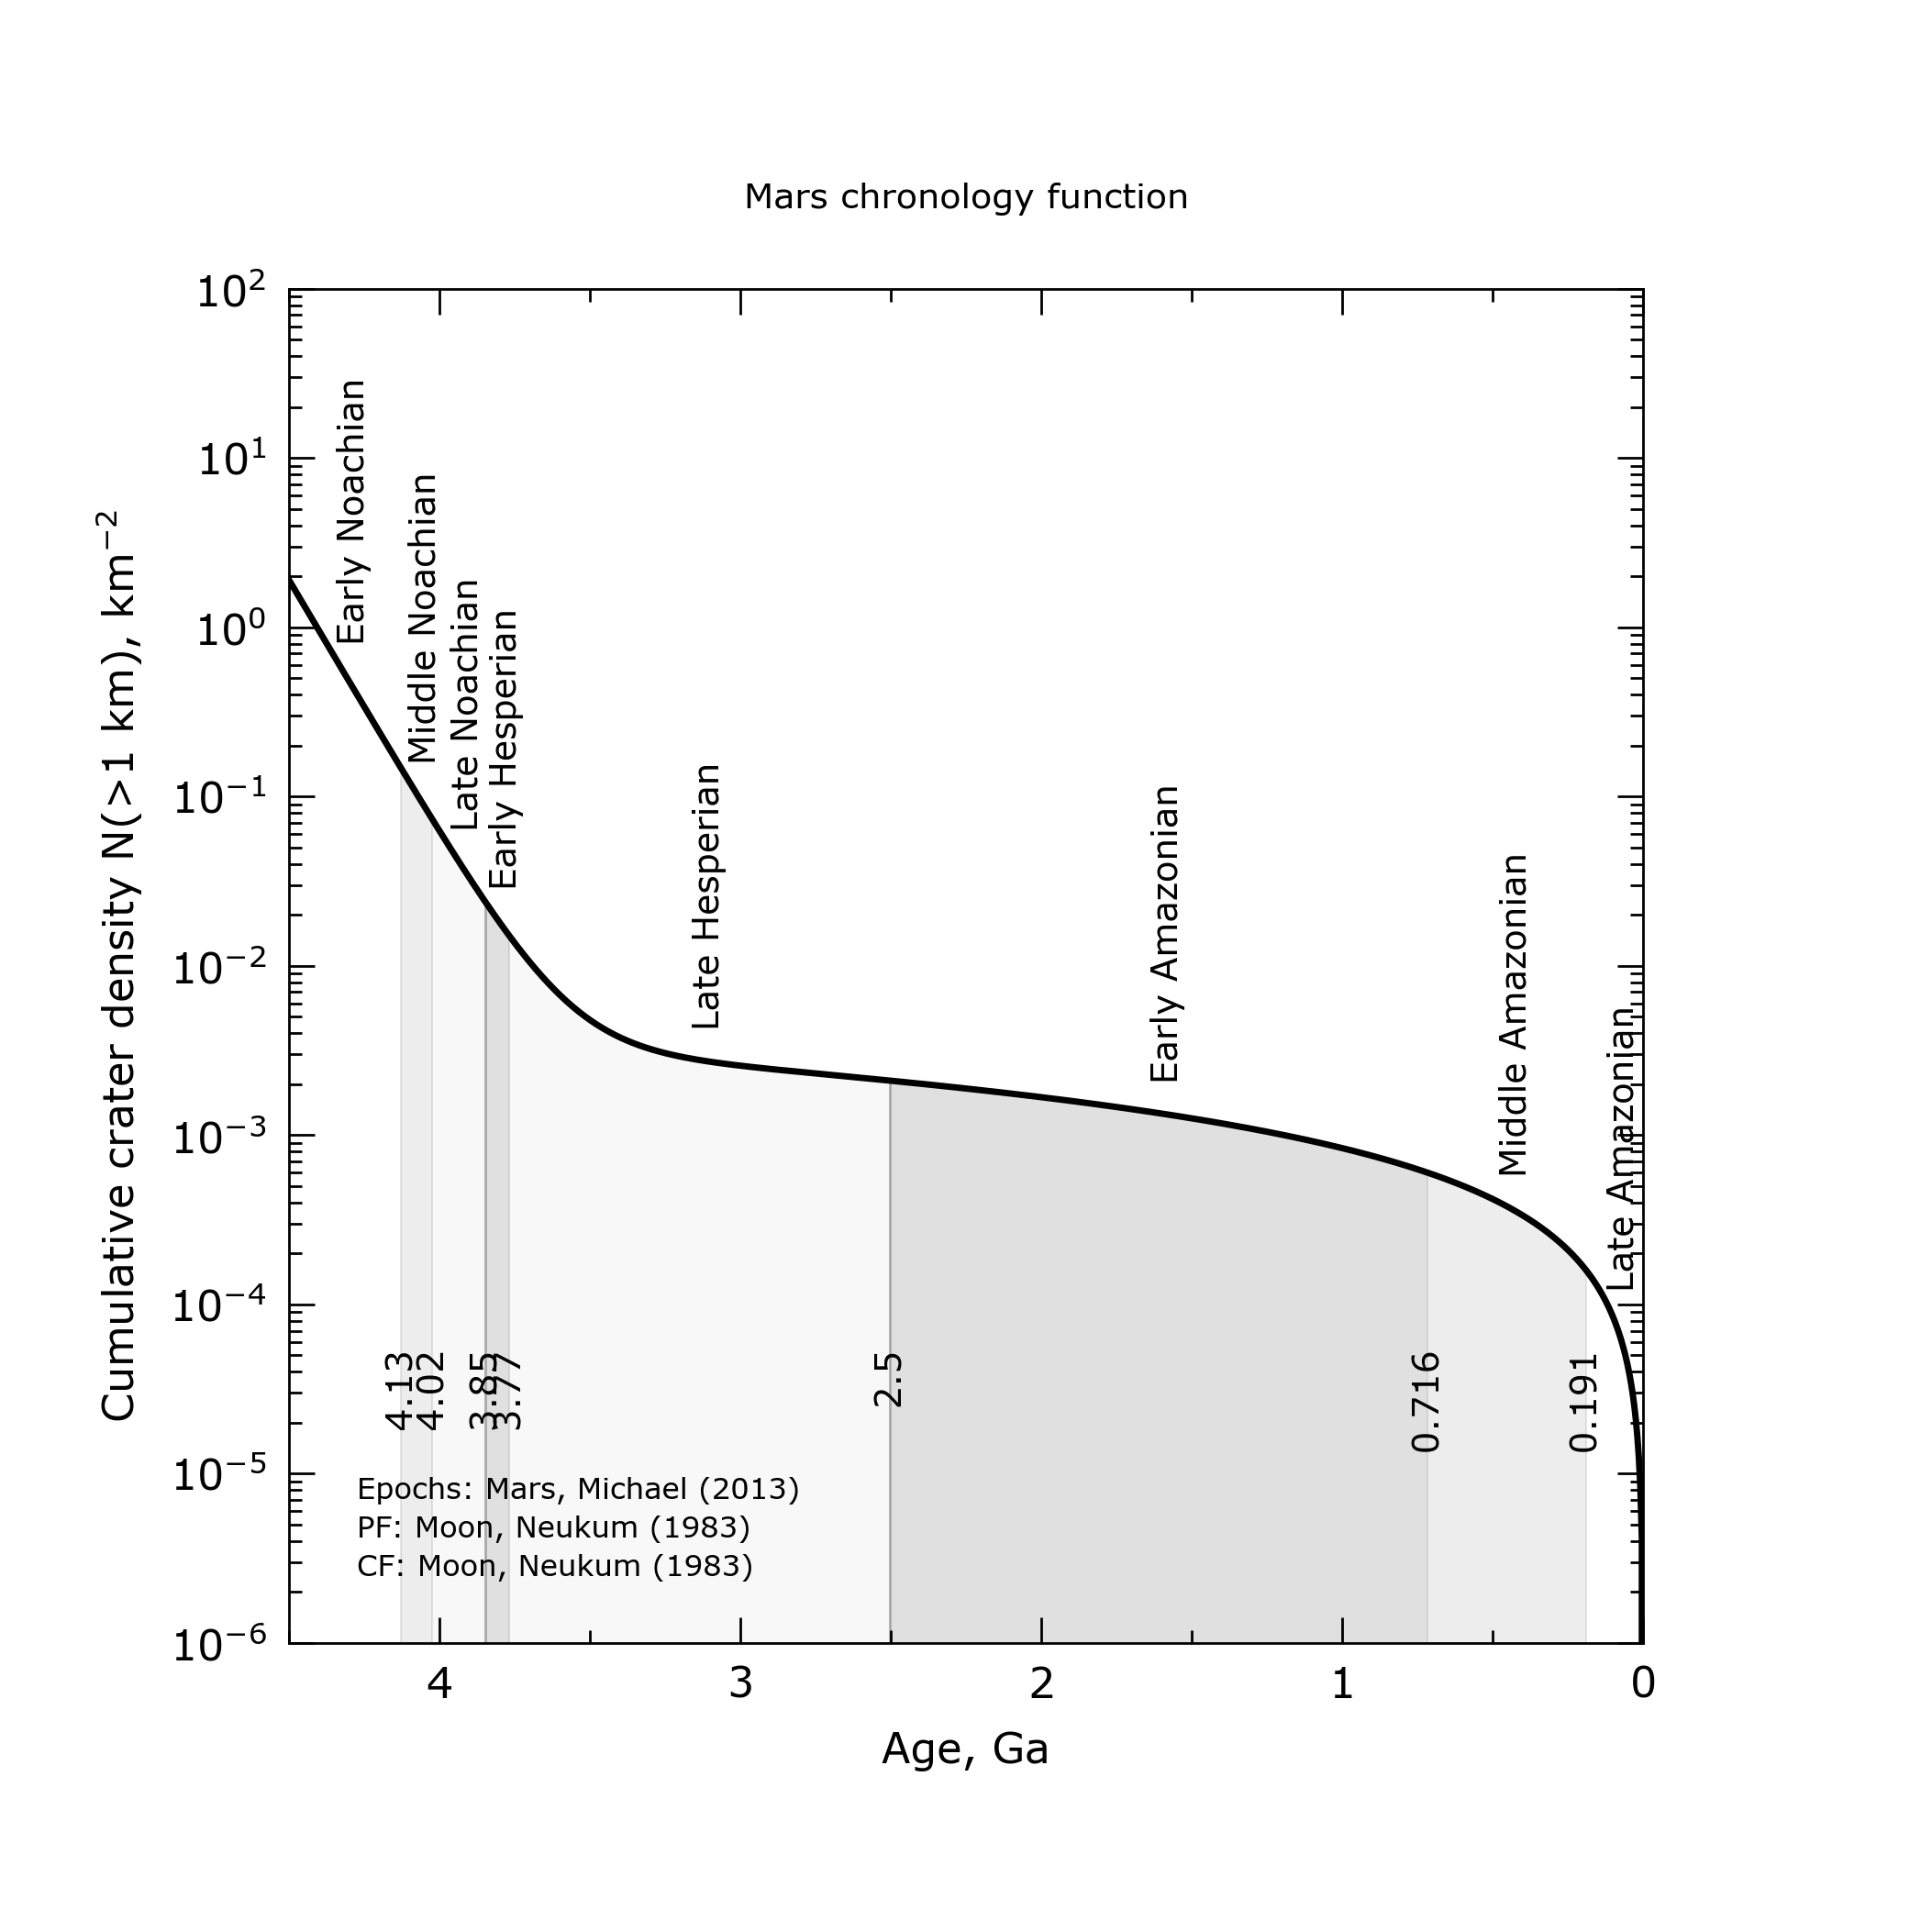

In [7]:
###$ Mars chronology
path = './'
craterstats([
 "-pr",
 "chronology", 
 "-ep", 
 "mars", 
 "-title", 
 "Mars chronology function"])


from IPython import display
display.Image("./out.png", width=800)

In [8]:
os.remove("./out.png")

## Loading a Lunar crater database

This is to exemplify crater size-frequency distribution age determination. 

The alternative would be to map crater manually, or to use published data, e.g. from a paper (see further below)

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pyproj import CRS

r_mercury = 2439400 # 2439700(IAU)
r_venus = 6051000 # 6051800 (IAU )
r_moon = 1737400 
r_mars = 3396190 #(large semimajor)
r_ceres = 470000  # 476200 (IAU )
r_titan = 2575000  # 2574730 (IAU )
r_europa = 1560800 # 1560800 (IAU )
r_callisto = 2410300 # 2410300 (IAU )
r_ganymede = 2632345 # 2631200 (IAU )

In [10]:
input_wang_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Moon_wang/LU1319373_Wang & Wu_2021.txt'
moon_wang=pd.read_table(input_wang_mars, skiprows=16)  # skips
# rename "Lonitude" to "Longitude"
moon_wang.rename(columns={'Lonitude(degree)': 'Longitude(degree)'}, inplace=True)
moon_wang.head()

# create geodataframe
moon_wang_gdf = gpd.GeoDataFrame(moon_wang, geometry=gpd.points_from_xy(moon_wang['Longitude(degree)'], moon_wang['Latitude(degree)']))

# set CRS 
gcs_moon_2000 = CRS.from_proj4(str('+proj=latlong +R='+str(r_moon))+' +no_defs')

moon_wang_gdf.set_crs(gcs_moon_2000, inplace=True, allow_override=True)

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m),geometry
0,1,-180.000,11.9500,2755.8,120.0,0,0.000,0.0000,0.0,POINT (-180.00000 11.95000)
1,2,-180.000,12.1700,3061.2,194.5,0,0.000,0.0000,0.0,POINT (-180.00000 12.17000)
2,3,-180.000,10.0700,5882.0,369.5,0,0.000,0.0000,0.0,POINT (-180.00000 10.07000)
3,4,-180.000,20.0910,1503.0,72.5,1,0.000,20.0910,1503.4,POINT (-180.00000 20.09100)
4,5,-180.000,9.6476,3900.0,347.5,1,180.000,9.6476,3899.7,POINT (-180.00000 9.64760)
...,...,...,...,...,...,...,...,...,...,...
1319368,1319369,179.999,33.3018,1217.0,192.8,0,0.000,0.0000,0.0,POINT (179.99900 33.30180)
1319369,1319370,179.999,-48.6840,1084.0,98.3,1,-0.001,-48.6844,1084.1,POINT (179.99900 -48.68400)
1319370,1319371,179.999,-15.0080,1374.0,82.5,1,-0.001,-15.0084,1374.0,POINT (179.99900 -15.00800)
1319371,1319372,179.999,-11.6510,2063.0,118.5,1,-0.001,-11.6511,2063.3,POINT (179.99900 -11.65100)


## Loading global Lunar geologic units

for some Moon-related cartographic aspects, please see:

* https://github.com/europlanet-gmap/winter-school-2023/tree/main/crs
  * https://github.com/europlanet-gmap/winter-school-2023/blob/main/crs/notebooks/map-projections.ipynb
  * https://indico.obspm.fr/event/1713/contributions/915/ 

e.g. from Fortezzo et al. (2020)

In [11]:
lunar_geo_units_input = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/geologic_maps/moon_global_geologic_map/Unified_Geologic_Map_of_the_Moon_GIS/Lunar_GIS/Shapefiles/GeoUnits.shp'

In [12]:
lunar_geo_units = gpd.read_file(lunar_geo_units_input)
lunar_geo_units.head()

,FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
0,Ec,Eratosthenian,Crater Unit,8.285692e+05,1.693911e+10,1.419859e+09,"POLYGON ((-5282287.849 -2552297.886, -5280392...."
1,Ic2,Imbrian,Upper Crater Unit,4.473225e+04,9.971887e+07,3.507810e+07,"POLYGON ((-5238242.288 -2101313.161, -5237739...."
2,Ec,Eratosthenian,Crater Unit,1.138770e+05,6.497932e+08,7.355946e+07,"POLYGON ((-5458202.298 -2520165.506, -5457578...."
3,Ic2,Imbrian,Upper Crater Unit,2.131684e+06,1.316162e+11,4.701449e+10,"POLYGON ((-5284706.411 -1931376.919, -5284294...."
4,Ib,Imbrian,Basin Undivided Unit,2.321815e+06,4.533166e+10,8.125227e+09,"POLYGON ((-5123736.636 -2344383.828, -5123972...."


<AxesSubplot: >

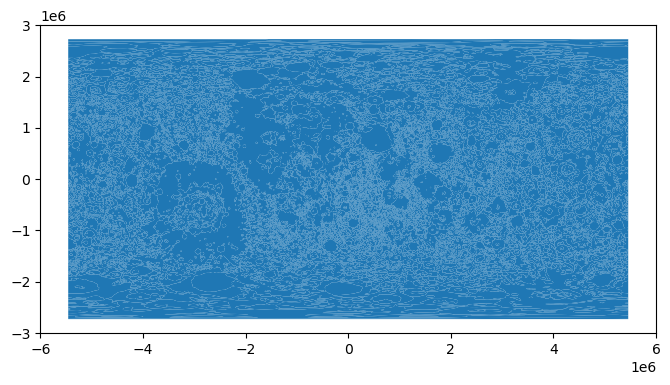

In [13]:
lunar_geo_units.plot(figsize=(8,4))

In [14]:
lunar_geo_units.crs

<Projected CRS: PROJCS["Moon2000_EquidistantCylindrical_clon0",GEO ...>
Name: Moon2000_EquidistantCylindrical_clon0
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Equidistant Cylindrical
Datum: D_Moon_2000
- Ellipsoid: Moon_2000_IAU_IAG
- Prime Meridian: Reference_Meridian

In [15]:
# reproject to geographic
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_moon))+' +no_defs'))
gcs_moon_2000 = CRS.from_proj4(str('+proj=latlong +R='+str(r_moon))+' +no_defs')
lunar_geo_units_geographic = lunar_geo_units.to_crs(gcs_moon_2000)

+proj=latlong +R=1737400 +no_defs +type=crs


### Overplot of craters & geo units 

<AxesSubplot: xlabel='Longitude(degree)', ylabel='Latitude(degree)'>

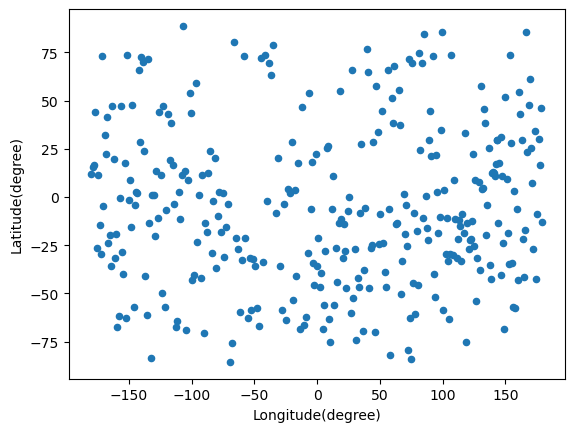

In [16]:
# decimate heavily craters for speed, for now
moon_wang_decimated = moon_wang.iloc[::4000, :]
moon_wang_decimated.plot.scatter(x='Longitude(degree)', y='Latitude(degree)')

<AxesSubplot: xlabel='Longitude(degree)', ylabel='Latitude(degree)'>

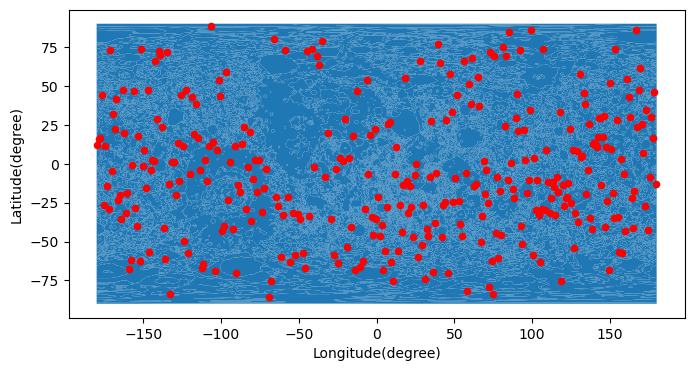

In [17]:
ax = lunar_geo_units_geographic.plot(figsize=(8,4))
moon_wang_decimated.plot.scatter(x='Longitude(degree)', y='Latitude(degree)', ax=ax, color='red')

In [18]:
lunar_geo_units_geographic.to_file('/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/geologic_maps/moon_global_geologic_map/geologic_units_moon_geographic.gpkg')

### Choosing a unit / area

Since craters & map units have the same CRS, one can use the crater size-frequency distribution of the crater in the database, to calculate a model age of the unit, e.g. selecting an area, possibly a large one for ease

In [19]:
# select an area, by query,
# e.g. Mare Crisium. which is mapped in the global map as Imbriam, with FID 8966 i.e. id FID - 1 = 8965
# e using [[]] returns a DataFrame.
# using [] not

# change formatting options to see area not in scientific notation
pd.options.display.float_format = '{:.5f}'.format


crisium = lunar_geo_units_geographic.loc[[8965]]
crisium

,FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
8965,Im2,Imbrian,Upper Mare Unit,6809674.20964,181420024969.00000,172704806307.00000,"POLYGON ((64.17619 27.11159, 64.17493 27.10537..."


In [20]:
# reset back to defaults, i.e. scientific notation
pd.reset_option('^display.', silent=True)

In [21]:
crisium

,FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
8965,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,"POLYGON ((64.17619 27.11159, 64.17493 27.10537..."


In [22]:
crisium.crs

<Geographic 2D CRS: +proj=latlong +R=1737400 +no_defs +type=crs>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: unknown
- Ellipsoid: unknown
- Prime Meridian: Reference meridian

<AxesSubplot: >

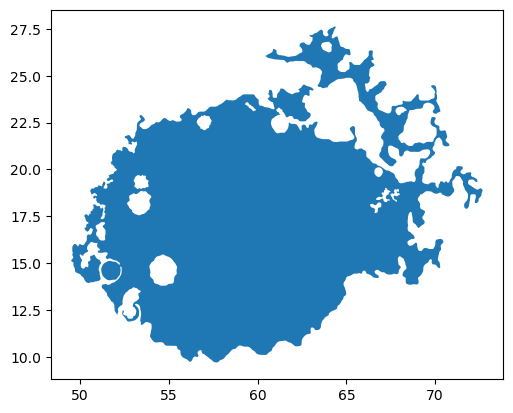

In [23]:
crisium.plot()

<AxesSubplot: >

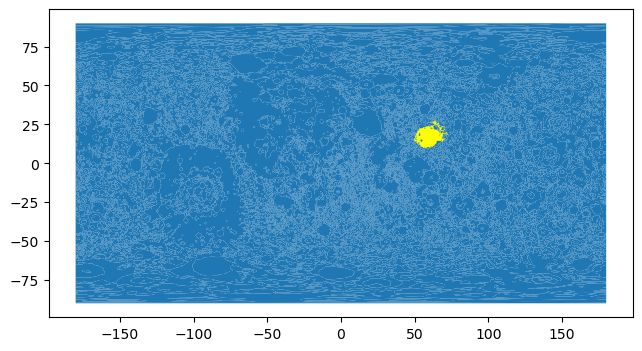

In [22]:
# overplot of crisium
ax1 = lunar_geo_units_geographic.plot(figsize=(8,4))
# moon_wang.plot.scatter(x='Longitude(degree)', y='Latitude(degree)', color='red', ax=ax1)
crisium.plot(color='yellow', ax=ax1)

(5.0, 30.0)

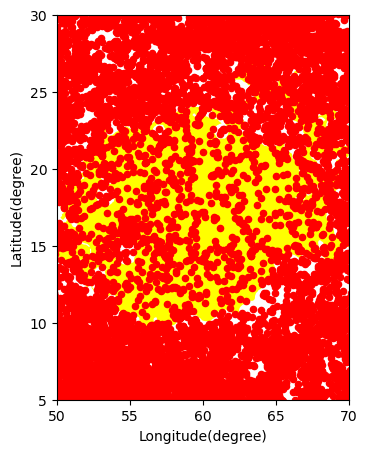

In [24]:
# overplot of crisium
# ax = lunar_geo_units_geographic.plot(figsize=(8,4))
ax2 = crisium.plot(color='yellow', figsize=(10, 5))
moon_wang_gdf.plot.scatter(x='Longitude(degree)', y='Latitude(degree)', color='red', ax=ax2)
ax2.set_xlim(50,70)
ax2.set_ylim(5,30)

## Finding intersection between unit and crater points

In [25]:
from shapely.geometry import Polygon

craters_in_crisium = gpd.overlay(moon_wang_gdf, crisium, how='intersection')

(5.0, 30.0)

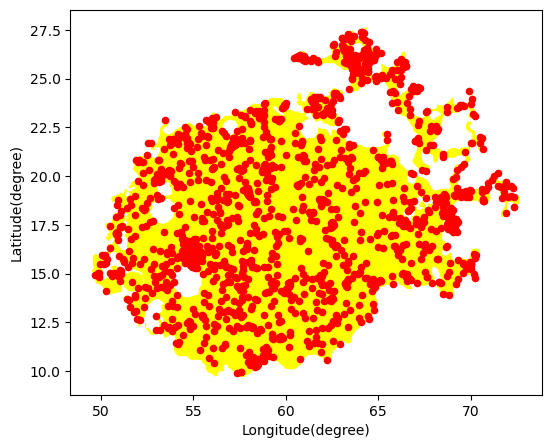

In [26]:
ax3 = crisium.plot(color='yellow', figsize=(10, 5))
craters_in_crisium.plot.scatter(x='Longitude(degree)', y='Latitude(degree)', color='red', ax=ax3)
ax2.set_xlim(50,70)
ax2.set_ylim(5,30)

## Plotting size-frequency distribution for unit

This requires some simple changes/export to file to match required input formats by [craterstats](https://github.com/ggmichael/craterstats).

Some data are already provided in a craterstats-friendly, form. E.g. see A. Lagain's repo for his database. See also the caveats described there: https://github.com/alagain/martian_crater_database

In [27]:
crisium

,FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
8965,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,"POLYGON ((64.17619 27.11159, 64.17493 27.10537..."


The database of Wang et al. (2020) contains area information. This particular aspect does not seem to be too documented, but it seems the ```AREA_GEO``` is related to the geodesic areas, [presumably done](https://pro.arcgis.com/en/pro-ap|p/latest/tool-reference/data-management/add-geometry-attributes.htm) with ArcGis PRO.

[Mare Crisium](https://en.wikipedia.org/wiki/Mare_Crisium) is supposed to be around 176000 km.

See also: https://gis.stackexchange.com/questions/413349/calculating-area-of-lat-lon-polygons-without-transformation-using-geopandas

In [28]:

no_craters = craters_in_crisium.shape
area_crisium = crisium['AREA_GEO'].values


print('Number of craters from Wang (2020) database over Crisium unit: ', no_craters[0],'\n')
print('measured area: ','%f'% area_crisium, 'm^2\n')
print('measured area: ', '%f'% (area_crisium/1000000), 'km^2')

Number of craters from Wang (2020) database over Crisium unit:  1460 

measured area:  172704806307.000000 m^2

measured area:  172704.806307 km^2


In [29]:
area_crisium[0]

172704806307.0

In [30]:
craters_in_crisium.head(2)

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m),FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
0,761566,49.6983,14.9512,1078.6,73.4,0,0.0,0.0,0.0,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (49.69830 14.95120)
1,762074,49.8336,15.0558,1110.0,66.9,0,0.0,0.0,0.0,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (49.83360 15.05580)


In [31]:
# craters from Wang (2000) database over Crisium, sorted by descending diameter
# we might have crisium itself... or something very large "1114520.0	"
craters_in_crisium.sort_values(by='Diameter(m)', ascending=False).head()


,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m),FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
684,795913,59.4647,16.3974,1114520.0,7274.0,3,59.4647,16.3974,1114520.0,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (59.46470 16.39740)
845,805201,61.8527,22.0017,34709.8,438.3,1,61.8361,21.9943,35156.0,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (61.85270 22.00170)
56,768410,51.6675,14.5703,32918.5,600.0,1,51.7003,14.5902,35007.6,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (51.66750 14.57030)
1437,840339,70.6713,18.7703,25191.9,509.5,1,70.6698,18.7562,26220.5,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (70.67130 18.77030)
977,810593,63.3532,20.8113,22196.2,261.8,1,63.3385,20.8520,22547.7,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (63.35320 20.81130)


Craterstats require a file with the following structure (see  https://github.com/ggmichael/craterstats/blob/main/src/craterstats/sample/sample.diam):
    
``` 
# Empty sample .diam file for Craterstats
#
# new format introduced 2014.03.04
# previous formats should still work, but this one to be preferred
#
#
# area, km^2
area = 100.
#
#
# table below may include any of the following field combinations:
#
#              km        -      deg  deg
# crater = {diameter
# crater = {diameter, fraction
# crater = {diameter, fraction, lon, lat
#
# 
crater = {diameter
1.1
2.3
3.0
1.7
}
```

In [32]:
# preparation of craterstats-compatibe ascii file
crater_list = craters_in_crisium["Diameter(m)"].values.tolist()


print(crater_list)

[1078.6, 1110.0, 1173.8, 1113.6, 1059.9, 9794.8, 1251.7, 1146.2, 1111.9, 1150.7, 1000.6, 1133.0, 1202.5, 1043.6, 1006.8, 1034.6, 1060.0, 1674.6, 1557.8, 1300.3, 3612.7, 1065.9, 1264.8, 1066.2, 1402.7, 1016.3, 1179.0, 1171.0, 1057.9, 1034.1, 1013.1, 1054.8, 3174.1, 1166.9, 1234.9, 1207.6, 1162.8, 1208.3, 1314.4, 1191.9, 1342.5, 1013.0, 1004.2, 21335.5, 1060.5, 1113.9, 1058.0, 1330.1, 1010.5, 4307.1, 1024.4, 1234.2, 1320.0, 1093.5, 1421.7, 1610.5, 32918.5, 1033.7, 1023.7, 1182.4, 1452.2, 1285.5, 1970.8, 1088.8, 1012.3, 1142.7, 6713.3, 1154.2, 1316.3, 3641.9, 1154.8, 1670.3, 1734.9, 1194.8, 1049.0, 1609.4, 1122.3, 1397.7, 1504.9, 1211.9, 1094.0, 1109.6, 1514.8, 1353.0, 3152.1, 1000.9, 1464.0, 1252.3, 1085.9, 10426.6, 7016.9, 1002.1, 1105.6, 1008.5, 1071.7, 1127.4, 11479.7, 1008.0, 1212.3, 1246.2, 1198.2, 1089.5, 1220.6, 1071.3, 1215.1, 1101.1, 1395.9, 1628.4, 1345.0, 1589.3, 1151.6, 1306.1, 1111.5, 1068.8, 1122.2, 1072.6, 1050.0, 1039.6, 1560.0, 1034.6, 1217.5, 1847.6, 1063.8, 1260.5, 103

In [33]:
!ls .ipynb_checkpoints/

crater_chronology-checkpoint.ipynb  planetary_craters-checkpoint.ipynb
crater_databases-checkpoint.ipynb   scratch-checkpoint.ipynb
crater_morphometry-checkpoint.ipynb


In [34]:
# this could better become a function, but for now it's OK.

diam_file_area = area_crisium
diam_file_start = 'crater = {diameter'

diam_file_stop = '}'

out_diam_file = '../test/crisium.diam'

# create output file
open(out_diam_file, 'w+').close()

# fill file with stuff
with open(out_diam_file, "w") as outfile:
    outfile.write('area='+str(area_crisium[0]/1000000)+'\n')
    outfile.write(diam_file_start+'\n')
    for line in crater_list:
        outfile.write(str(round(line/1000, 3))+'\n')
    outfile.write(diam_file_stop)

### Plotting crater size-frequency distribution

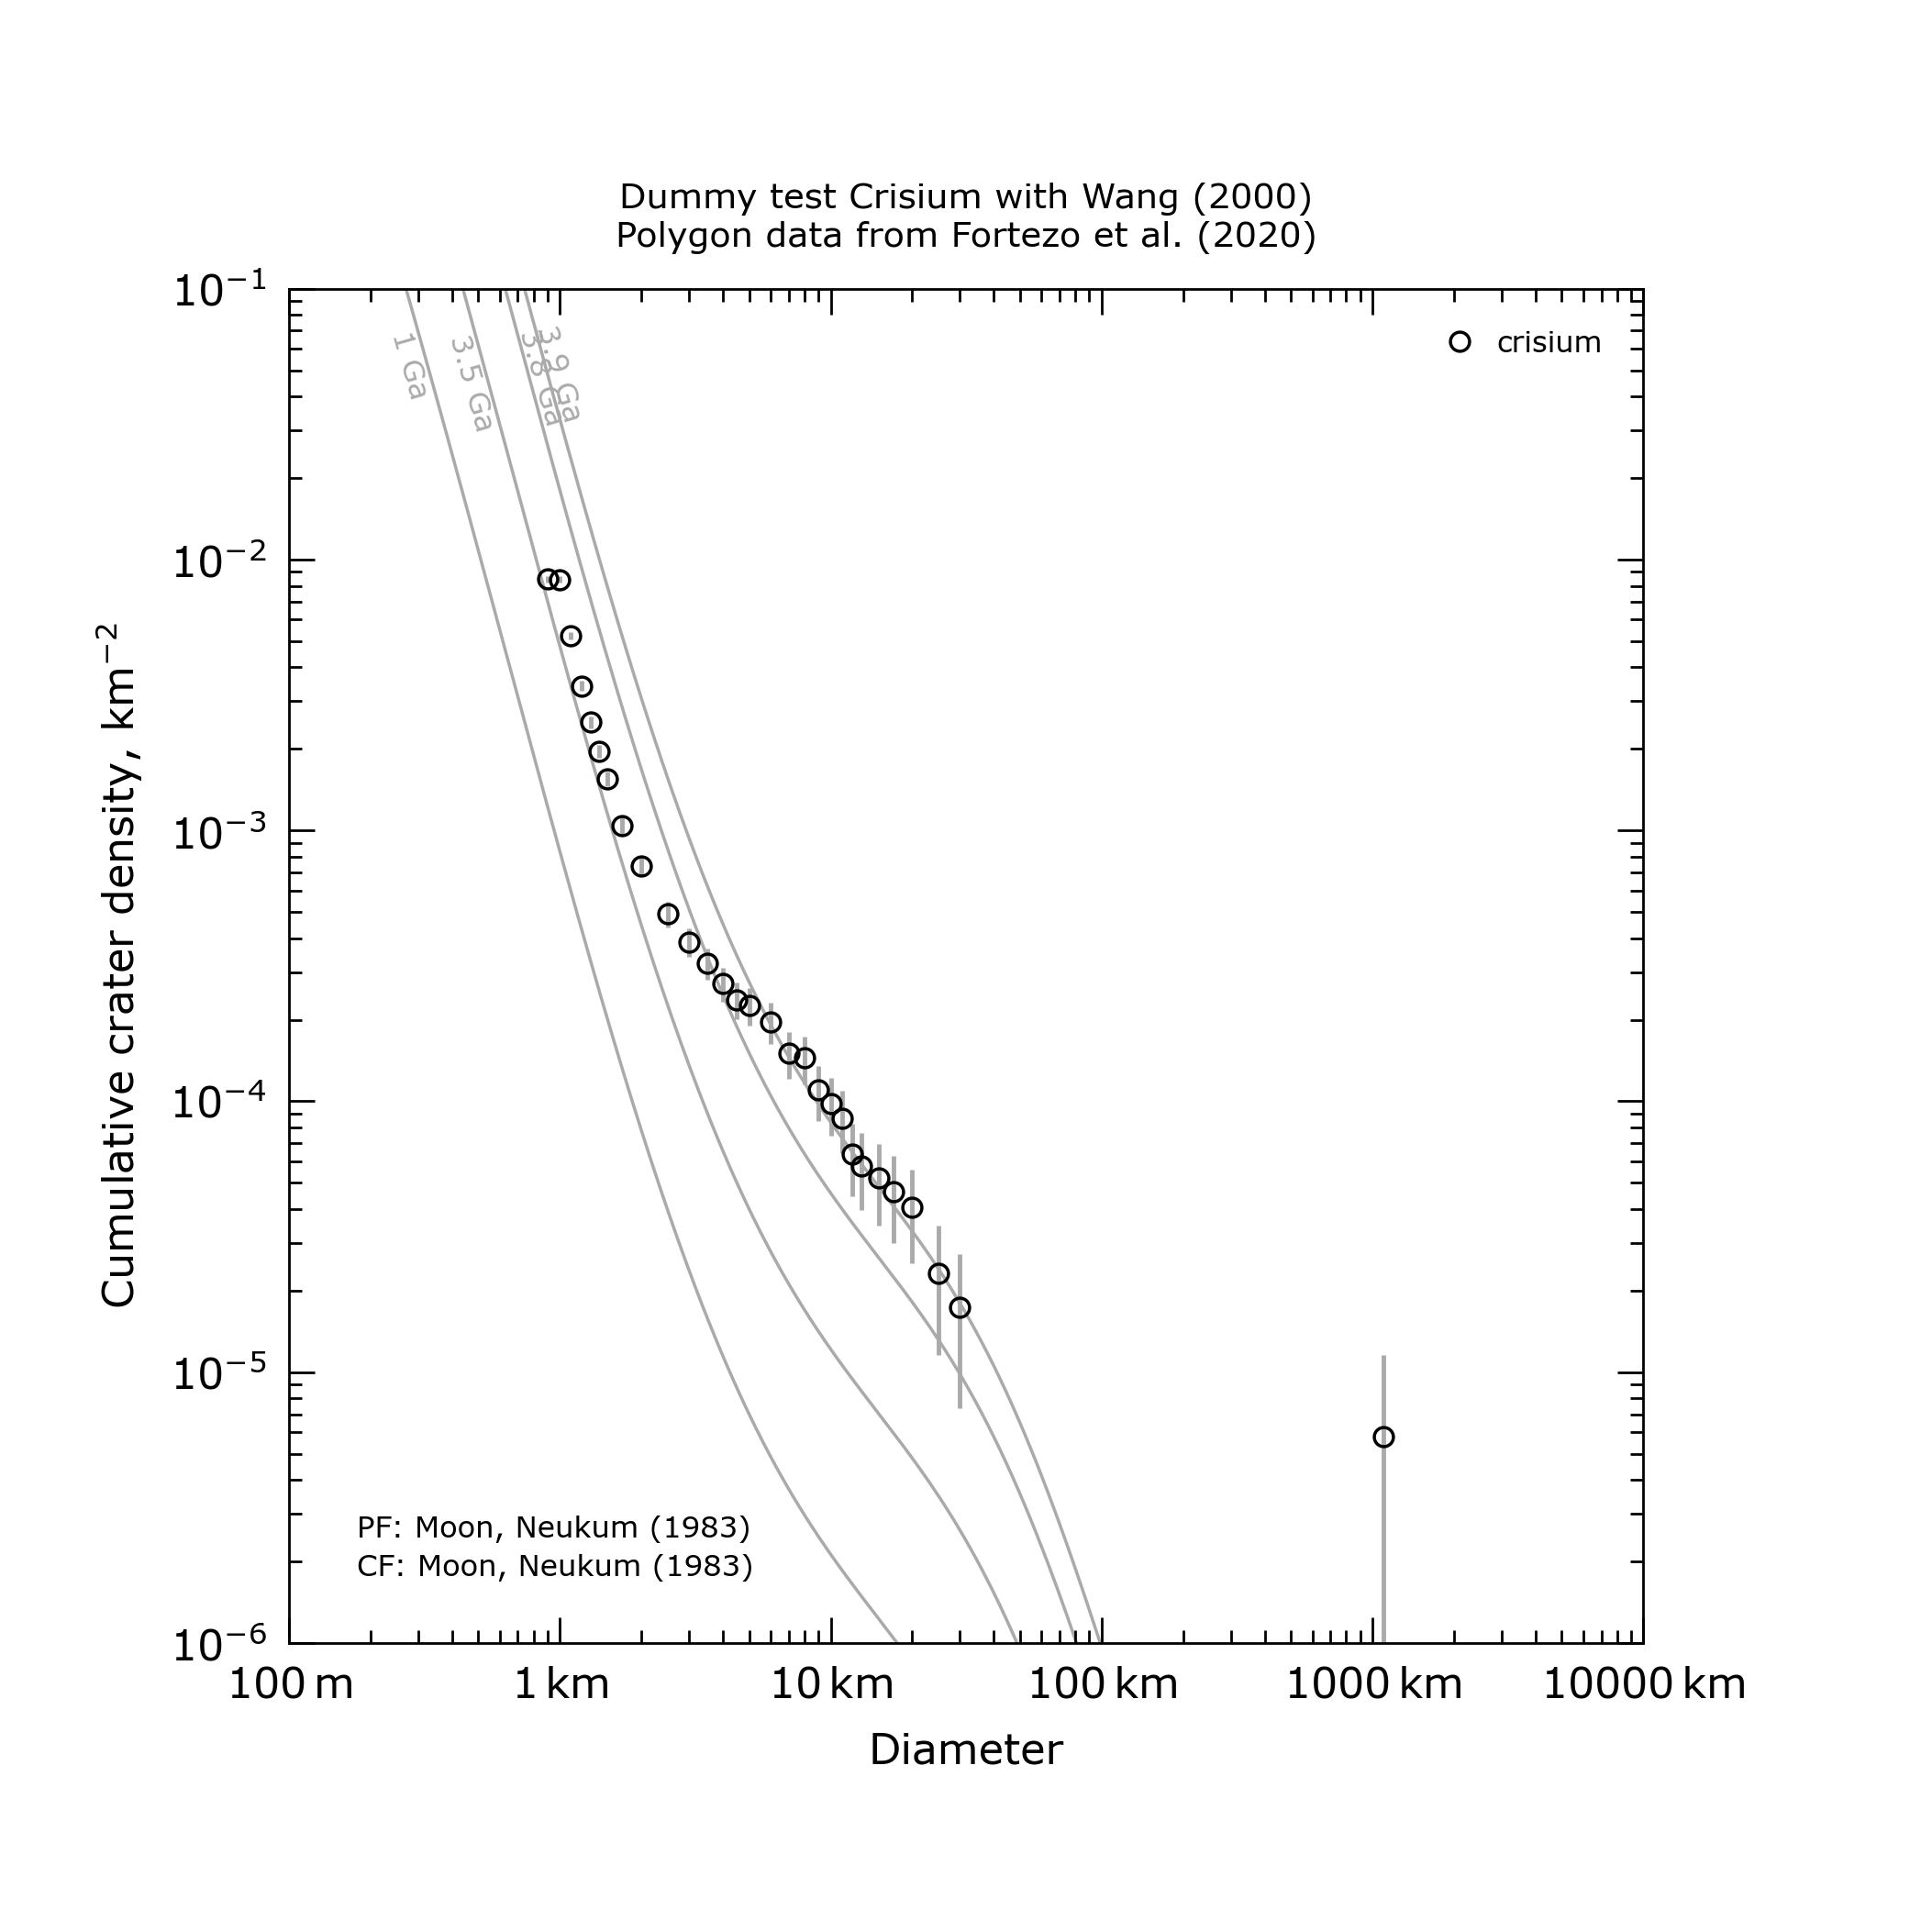

In [35]:
craterstats([
    "-pr",
    "cumul",
    # "-ep",
    # "moon",
    "-isochrons",
    "1,3.5,3.8a,3.9a",
    # "-p",
    # "range=[.2, 100]",
    "-legend",
    "nr",
    "-p",
    "source=../test/crisium.diam",
    "-title", 
    "Dummy test Crisium with Wang (2000)",
    "-subtitle",
    "Polygon data from Fortezo et al. (2020)"])


from IPython import display
display.Image("./out.png", width=800)

In [36]:
os.remove("./out.png")

In [37]:
# removal of outlier
craters_in_crisium2 = craters_in_crisium.query("`Diameter(m)` < 1000000")

In [38]:
craters_in_crisium2.sort_values(by='Diameter(m)', ascending=False).head(3)

,ID,Longitude(degree),Latitude(degree),Diameter(m),Depth(m),Source,Source_lon(degree),Soure_lat(degree),Source_dia(m),FIRST_Unit,FIRST_Un_1,FIRST_Un_2,Shape_Leng,Shape_Area,AREA_GEO,geometry
845,805201,61.8527,22.0017,34709.8,438.3,1,61.8361,21.9943,35156.0,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (61.85270 22.00170)
56,768410,51.6675,14.5703,32918.5,600.0,1,51.7003,14.5902,35007.6,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (51.66750 14.57030)
1437,840339,70.6713,18.7703,25191.9,509.5,1,70.6698,18.7562,26220.5,Im2,Imbrian,Upper Mare Unit,6.809674e+06,1.814200e+11,1.727048e+11,POINT (70.67130 18.77030)


In [39]:

# list from column, filtering out very large ones itself caugth in the intersection, even larger than Crisium itself...
crater_list2 = craters_in_crisium2["Diameter(m)"].values.tolist()

# this could better become a function, but for now it's OK.
diam_file_area = area_crisium
diam_file_start = 'crater = {diameter'

diam_file_stop = '}'

out_diam_file = '../test/crisium2.diam'

# create output file
open(out_diam_file, 'w+').close()

# fill file with stuff
with open(out_diam_file, "w") as outfile:
    outfile.write('area='+str(area_crisium[0]/1000000)+'\n')
    outfile.write(diam_file_start+'\n')
    for line in crater_list2:
        outfile.write(str(round(line/1000, 3))+'\n')
    outfile.write(diam_file_stop)

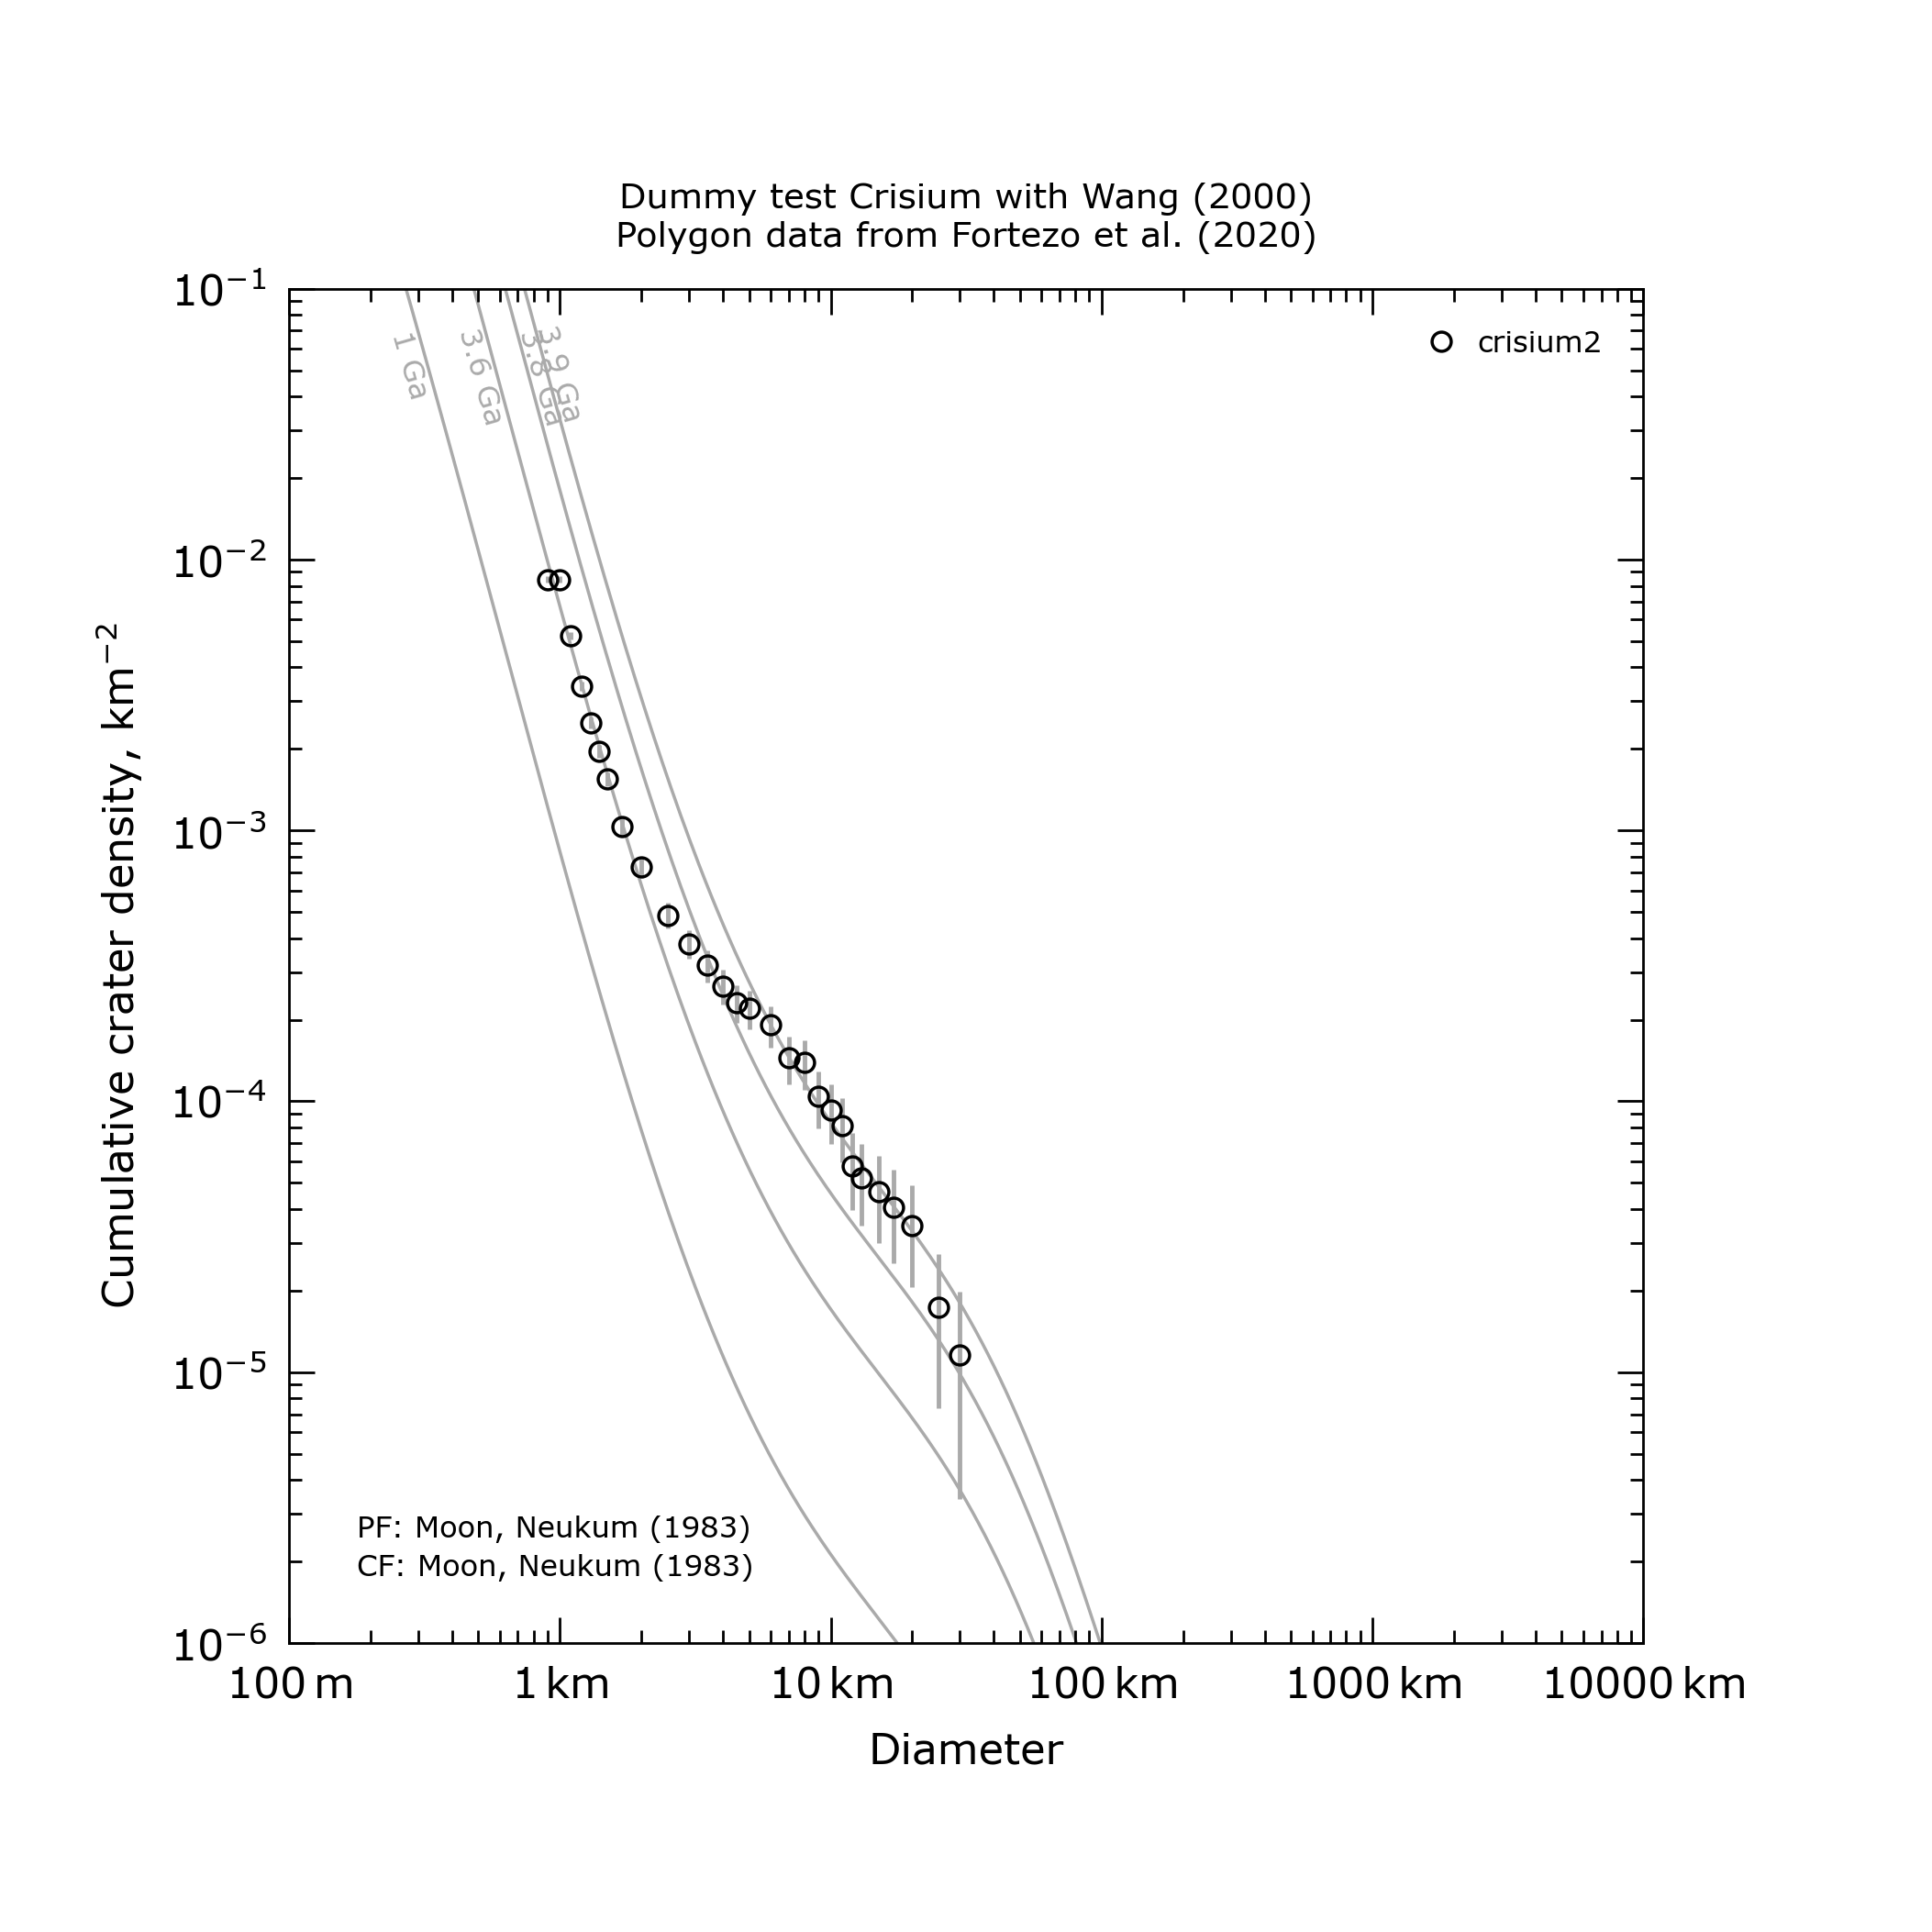

In [40]:
craterstats([
    "-pr",
    "cumul",
    # "-ep",
    # "moon",
    "-isochrons",
    "1,3.6,3.8a,3.9a",
    # "-p",
    # "range=[.2, 100]",
    "-legend",
    "nr",
    "-p",
    "source=../test/crisium2.diam",
    "-title", 
    "Dummy test Crisium with Wang (2000)",
    "-subtitle",
    "Polygon data from Fortezo et al. (2020)"])


from IPython import display
display.Image("./out.png", width=800)

One can very roughly compare with this very rough estimates of Crisium age from published data, e.g. see van der Bogert et al. (2017), Hiesinger et al. (2011), van der Bogert, et al. (2017). See also e.g. Head et al. (1978), Haber et al. (2022).



## Loading a Mars crater database

In [41]:
# load robbins database

# input_lagain_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Mars_Lagain/lagain_db/lagain_db.shp'
input_robbins_mars = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/crater_databases/Mars_Robbins/RobbinsCraterDatabase_20120821/RobbinsCraterDatabase_20120821_LatLonDiam.shp'

In [42]:
mars_robbins=gpd.read_file(input_robbins_mars)


In [43]:
mars_robbins.shape

(384343, 5)

In [44]:
mars_robbins.crs

<Geographic 2D CRS: GEOGCS["GCS_Mars_2000_Sphere",DATUM["D_Mars_2000_S ...>
Name: GCS_Mars_2000_Sphere
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_Mars_2000_Sphere
- Ellipsoid: Mars_2000_IAU_IAG_Sphere
- Prime Meridian: Reference_Meridian

In [45]:
mars_robbins.head()

,LON_E,LAT,DiamKM,CraterID,geometry
0,108.746,84.367,82.10,01-000000,POINT (108.74600 84.36700)
1,164.464,72.760,82.02,01-000001,POINT (164.46400 72.76000)
2,-27.240,69.244,79.63,01-000002,POINT (-27.24000 69.24400)
3,160.575,70.107,74.81,01-000003,POINT (160.57500 70.10700)
4,95.617,77.996,73.53,01-000004,POINT (95.61700 77.99600)


<AxesSubplot: >

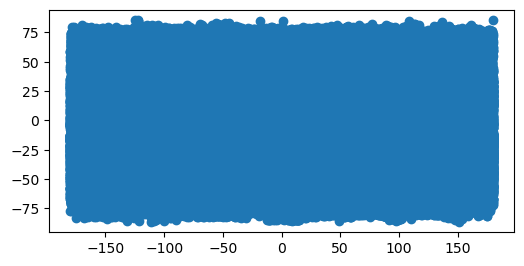

In [46]:
mars_robbins.plot(figsize=(6,3))

<AxesSubplot: xlabel='LON_E', ylabel='LAT'>

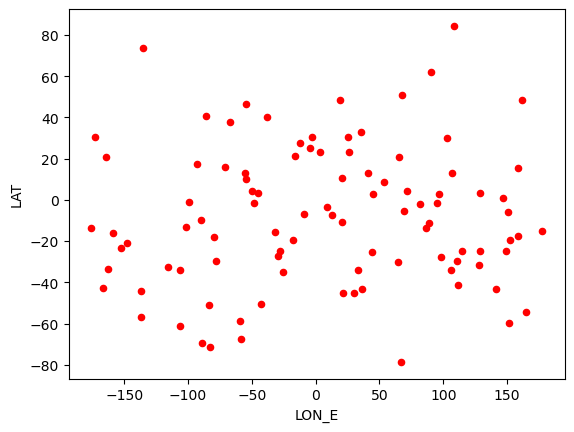

In [47]:
# decimate mars lagain, for speed
mars_robbins_decimated = mars_robbins.iloc[::4000, :]

mars_robbins_decimated.plot.scatter(x='LON_E', y='LAT', color='red')

## Loading global Mars geologic units

In [48]:
mars_geo_units_input = '/Volumes/ulthar/data/0_GLOBAL_PLANETARY_DATA/geologic_maps/mars_global_geologic_map/vector/global_geology.gpkg'
mars_geo_units = gpd.read_file(mars_geo_units_input)
mars_geo_units.head()

,OBJECTID,Shape_Leng,Shape_Area,Unit,UnitDesc,SphArea_km,geometry
0,1,1.004969e+07,4.450246e+11,lApc,Late Amazonian polar cap unit,103642.00,"MULTIPOLYGON (((-56.63683 -84.72985, -56.63235..."
1,2,1.357599e+06,3.214948e+10,Hpe,Hesperian polar edifice unit,15347.10,"MULTIPOLYGON (((21.93653 -80.13496, 21.96328 -..."
2,3,2.575993e+06,7.040982e+10,Hp,Hesperian polar unit,33723.60,"MULTIPOLYGON (((-36.84076 -79.79726, -36.83184..."
3,4,6.740798e+05,1.191163e+10,Hpe,Hesperian polar edifice unit,6217.34,"MULTIPOLYGON (((-20.70137 -77.96855, -20.68342..."
4,5,4.154933e+06,1.652814e+11,Hp,Hesperian polar unit,83363.70,"MULTIPOLYGON (((94.18004 -77.14730, 94.18898 -..."


<AxesSubplot: >

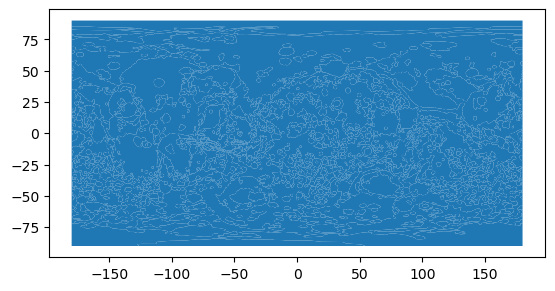

In [49]:
mars_geo_units.plot()

In [50]:
mars_geo_units.crs

<Geographic 2D CRS: GEOGCS["GCS_Mars_2000_Sphere",DATUM["Mars_2000_Sph ...>
Name: GCS_Mars_2000_Sphere
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: Mars_2000_(Sphere)
- Ellipsoid: Mars_2000_Sphere_IAU_IAG
- Prime Meridian: Reference_Meridian

<AxesSubplot: xlabel='LON_E', ylabel='LAT'>

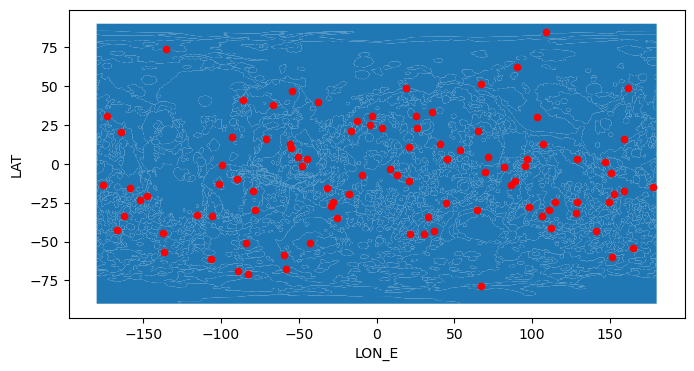

In [51]:
ax = mars_geo_units.plot(figsize=(8,4))
mars_robbins_decimated.plot.scatter(x='LON_E', y='LAT', ax=ax, color='red')

In [52]:
## Choosing a unit e.g. Elysium Mons
pd.options.display.float_format = '{:.5f}'.format


elysium = mars_geo_units.loc[[1089]]
elysium


,OBJECTID,Shape_Leng,Shape_Area,Unit,UnitDesc,SphArea_km,geometry
1089,1090,1350860.30541,105680455251.00000,Hve,Hesperian volcanic edifice unit,120173.00000,"MULTIPOLYGON (((147.68694 29.06745, 147.69991 ..."


In [53]:
# reset back to defaults, i.e. scientific notation
pd.reset_option('^display.', silent=True)

<AxesSubplot: >

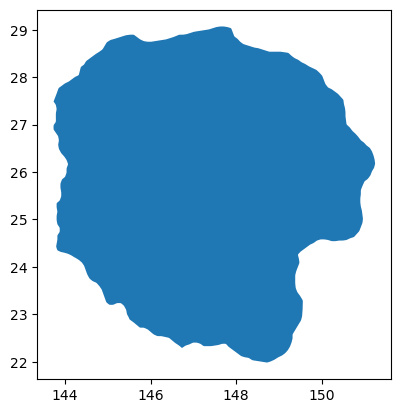

In [54]:
elysium.plot()

In [55]:
# both databases are in geographoic, but slighty different CRS naming:
print(elysium.crs)

GEOGCS["GCS_Mars_2000_Sphere",DATUM["Mars_2000_Sphere",SPHEROID["Mars_2000_Sphere_IAU_IAG",3396190,0],AUTHORITY["ESRI","106971"]],PRIMEM["Reference_Meridian",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [56]:
print(mars_robbins.crs)

GEOGCS["GCS_Mars_2000_Sphere",DATUM["D_Mars_2000_Sphere",SPHEROID["Mars_2000_IAU_IAG_Sphere",3396190,0]],PRIMEM["Reference_Meridian",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [57]:
# forcing the same CRS for both. This is done at the subset level, but can done globally (see earlier Moon example)
from pyproj import CRS

# overwrite crs
print(CRS.from_proj4(str('+proj=latlong +R='+str(r_mars))+' +no_defs'))

mars_robbins.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_mars))+' +no_defs'), inplace=True, allow_override=True)
elysium.set_crs(CRS.from_proj4(str('+proj=latlong +R='+str(r_mars))+' +no_defs'), inplace=True, allow_override=True)

+proj=latlong +R=3396190 +no_defs +type=crs


,OBJECTID,Shape_Leng,Shape_Area,Unit,UnitDesc,SphArea_km,geometry
1089,1090,1.350860e+06,1.056805e+11,Hve,Hesperian volcanic edifice unit,120173.0,"MULTIPOLYGON (((147.68694 29.06745, 147.69991 ..."


In [58]:

# find intersections
from shapely.geometry import Polygon

craters_in_elysium= gpd.overlay(mars_robbins, elysium, how='intersection')
craters_in_elysium.head()

,LON_E,LAT,DiamKM,CraterID,OBJECTID,Shape_Leng,Shape_Area,Unit,UnitDesc,SphArea_km,geometry
0,145.362,28.633,15.22,15-000139,1090,1.350860e+06,1.056805e+11,Hve,Hesperian volcanic edifice unit,120173.0,POINT (145.36200 28.63300)
1,147.761,26.968,14.04,15-000161,1090,1.350860e+06,1.056805e+11,Hve,Hesperian volcanic edifice unit,120173.0,POINT (147.76100 26.96800)
2,149.663,26.454,11.61,15-000206,1090,1.350860e+06,1.056805e+11,Hve,Hesperian volcanic edifice unit,120173.0,POINT (149.66300 26.45400)
3,149.041,26.788,11.33,15-000212,1090,1.350860e+06,1.056805e+11,Hve,Hesperian volcanic edifice unit,120173.0,POINT (149.04100 26.78800)
4,145.838,23.119,11.09,15-000217,1090,1.350860e+06,1.056805e+11,Hve,Hesperian volcanic edifice unit,120173.0,POINT (145.83800 23.11900)


<AxesSubplot: >

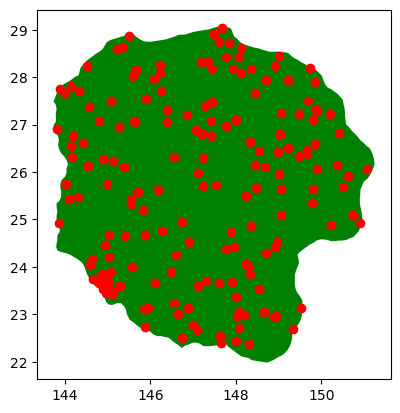

In [59]:
ax = elysium.plot(color='green')
craters_in_elysium.plot(color='red', ax=ax)


In [60]:
area_elysium = elysium['Shape_Area'].values
print('Elysium area: ', '%f'% (area_elysium/1000000), 'km^2')

Elysium area:  105680.455251 km^2


In [61]:
# plot size frequency distribution with cratersats

# preparation of craterstats-compatibe ascii file
crater_list = craters_in_elysium["DiamKM"].values.tolist()


print(crater_list)


[15.22, 14.04, 11.61, 11.33, 11.09, 9.3, 8.02, 7.28, 6.63, 6.53, 6.35, 5.14, 5.13, 4.53, 4.41, 4.02, 3.7, 3.36, 3.01, 2.81, 2.77, 2.73, 2.63, 2.6, 2.53, 2.53, 2.42, 2.35, 2.33, 2.25, 2.15, 2.12, 2.12, 2.11, 2.08, 2.08, 2.01, 2.01, 2.0, 1.9, 1.9, 1.86, 1.84, 1.84, 1.83, 1.81, 1.79, 1.78, 1.77, 1.76, 1.76, 1.73, 1.67, 1.66, 1.65, 1.63, 1.62, 1.61, 1.58, 1.58, 1.57, 1.57, 1.53, 1.52, 1.5, 1.47, 1.47, 1.47, 1.45, 1.45, 1.45, 1.43, 1.42, 1.39, 1.39, 1.39, 1.38, 1.37, 1.37, 1.37, 1.36, 1.36, 1.35, 1.33, 1.33, 1.32, 1.32, 1.31, 1.31, 1.31, 1.3, 1.3, 1.29, 1.29, 1.29, 1.29, 1.28, 1.28, 1.27, 1.27, 1.26, 1.25, 1.24, 1.24, 1.22, 1.22, 1.22, 1.22, 1.22, 1.22, 1.21, 1.21, 1.2, 1.2, 1.19, 1.19, 1.19, 1.19, 1.19, 1.18, 1.18, 1.18, 1.18, 1.18, 1.18, 1.17, 1.17, 1.16, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.15, 1.14, 1.12, 1.12, 1.12, 1.12, 1.12, 1.11, 1.11, 1.1, 1.1, 1.08, 1.08, 1.08, 1.07, 1.07, 1.07, 1.07, 1.07, 1.07, 1.07, 1.06, 1.06, 1.05, 1.05, 1.05, 1.04, 1.04, 1.04, 1.04, 1.03, 1.03, 1.03,

In [62]:
# this could better become a function, but for now it's OK.

diam_file_area = area_elysium
diam_file_start = 'crater = {diameter'

diam_file_stop = '}'

out_diam_file = '../test/elysium.diam'

# create output file
open(out_diam_file, 'w+').close()

# fill file with stuff
with open(out_diam_file, "w") as outfile:
    outfile.write('area='+str(area_elysium[0]/1000000)+'\n')
    outfile.write(diam_file_start+'\n')
    for line in crater_list:
        outfile.write(str(round(line, 3))+'\n') # PLEASE NOTE ROBBINS@MARS HAS DIAMETERS IN KM NOT IN M
    outfile.write(diam_file_stop)

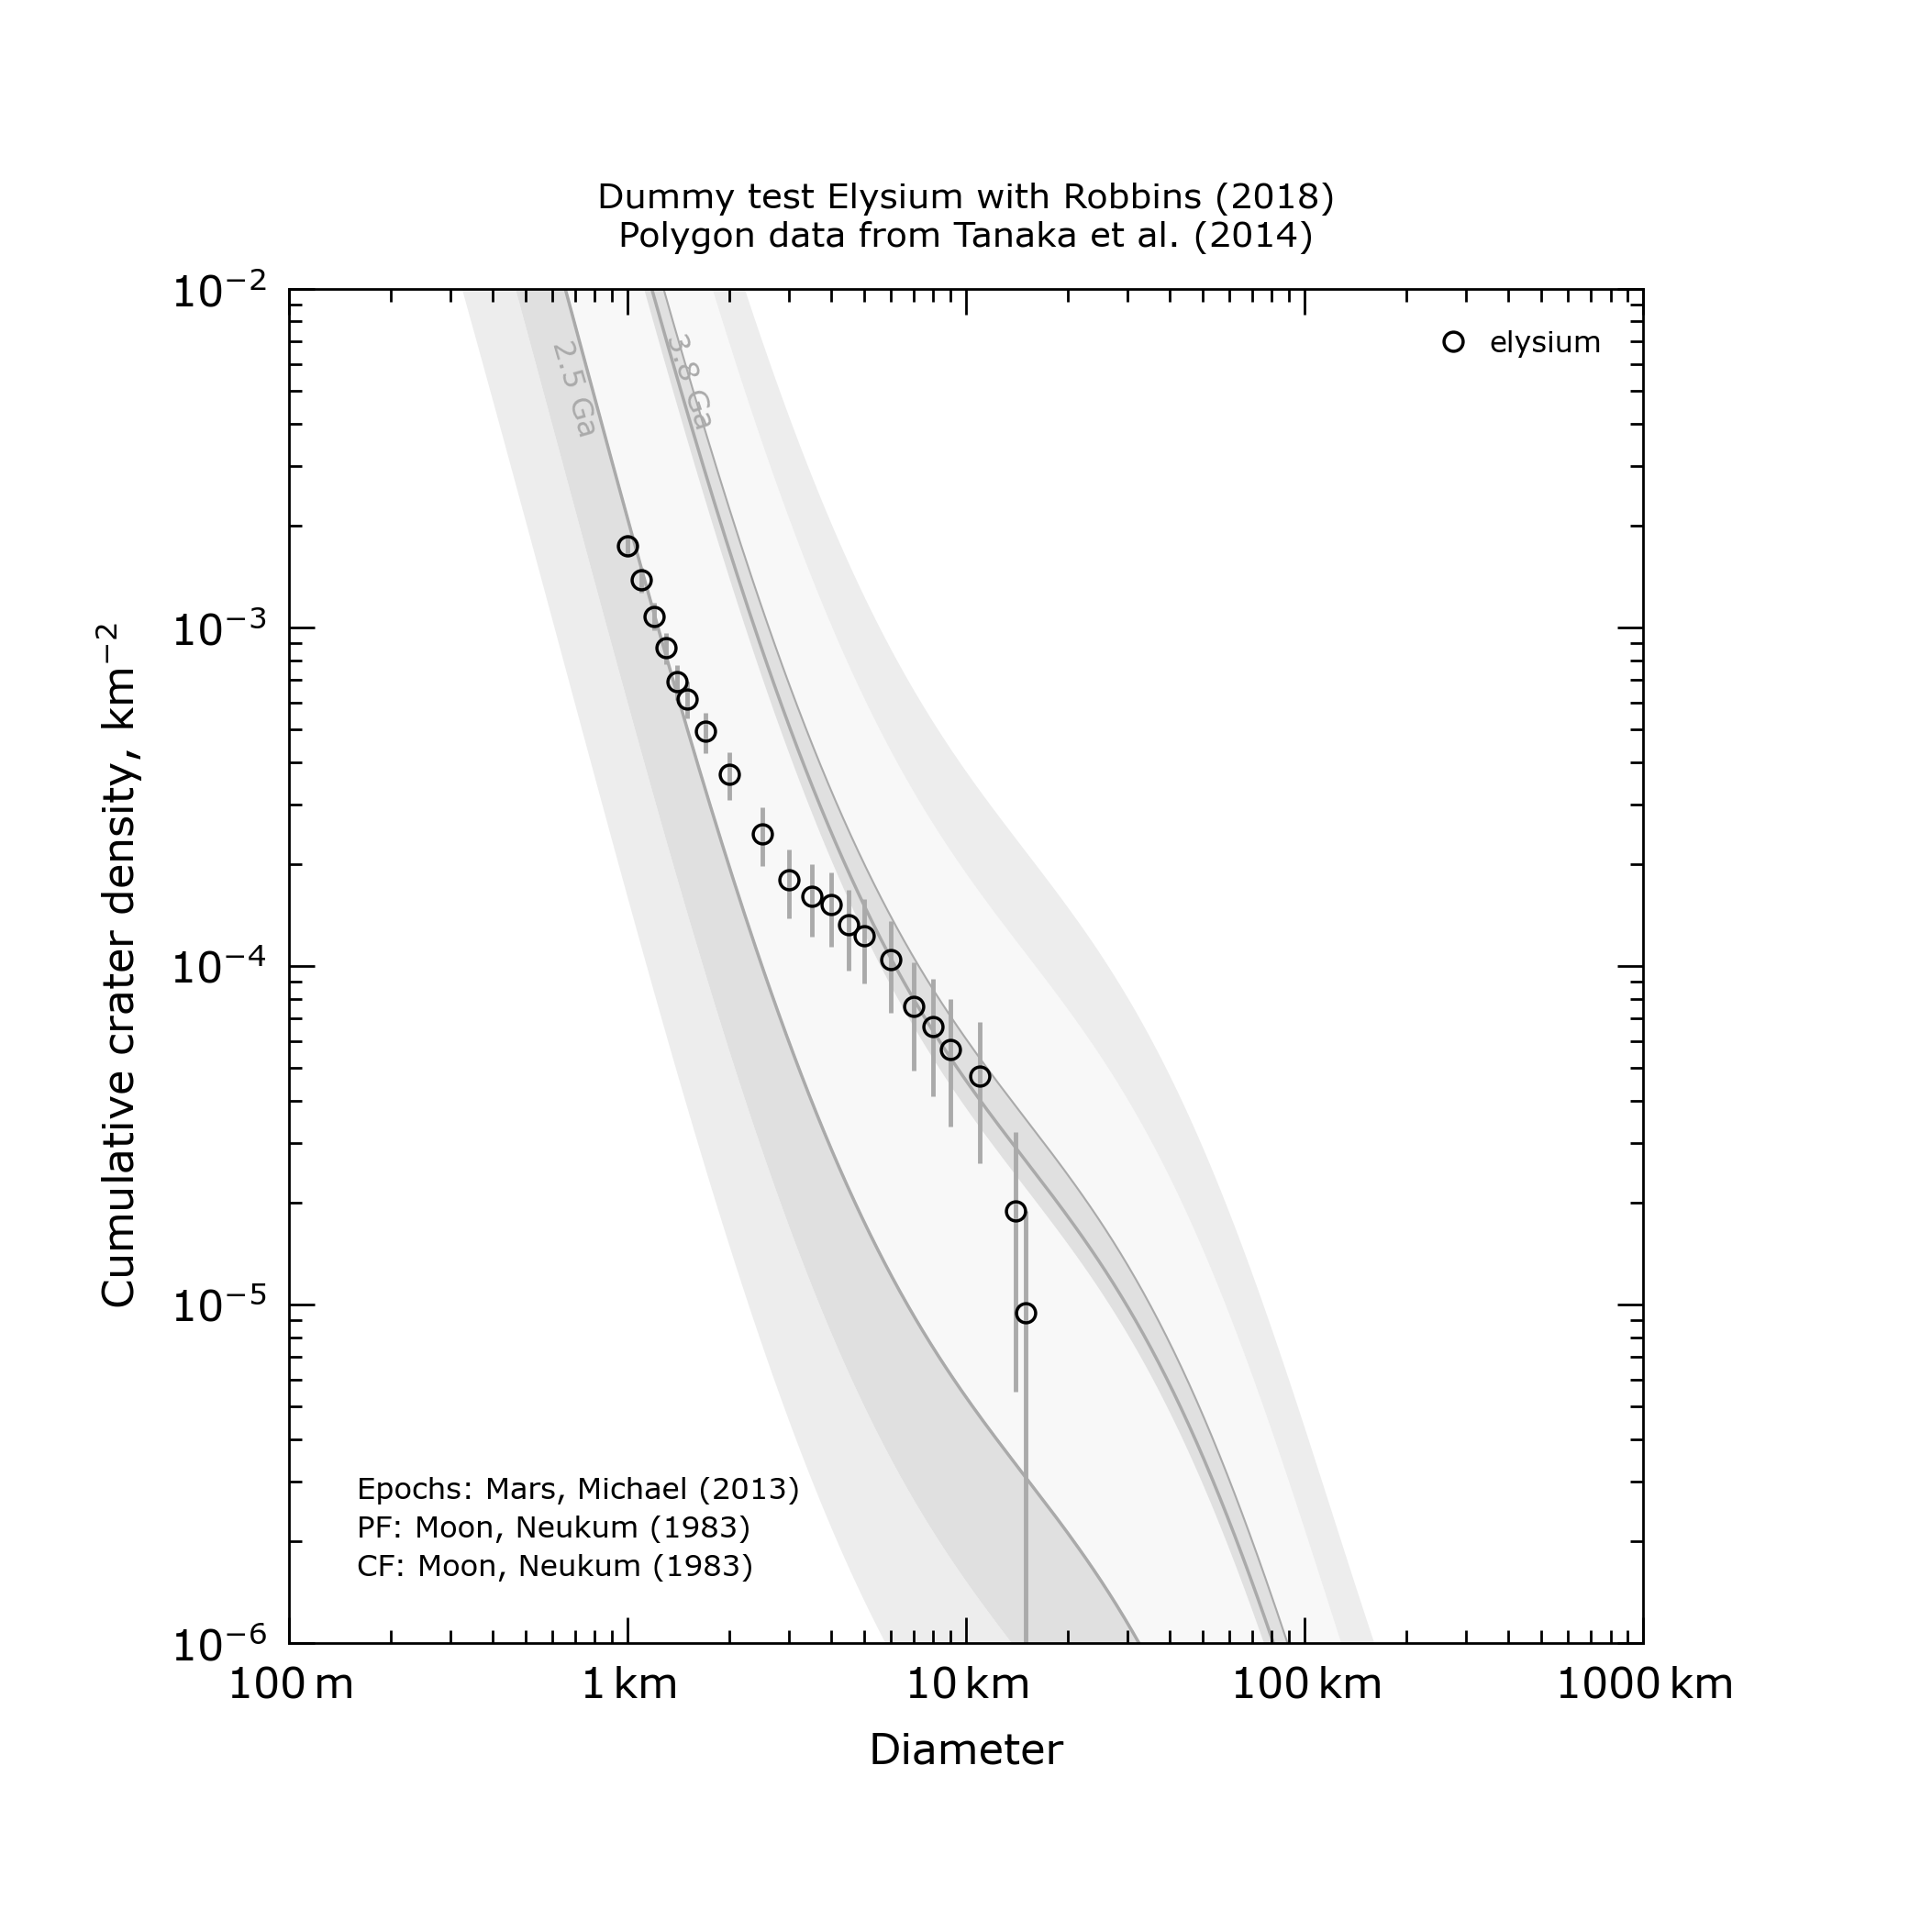

In [63]:
craterstats([
    "-pr",
    "cumul",
    "-ep",
    "mars",
    "-isochrons",
    "2.5, 3.8a",
    "-legend",
    "nr",
    "-p",
    "source=../test/elysium.diam",
    "-title", 
    "Dummy test Elysium with Robbins (2018)",
    "-subtitle",
    "Polygon data from Tanaka et al. (2014)"])


from IPython import display
display.Image("./out.png", width=800)

This can also be plotted in Hartmann style. This approach is far too simplistic. For a more thorough analysis please refer e.g. to Platz and Michael (2011).

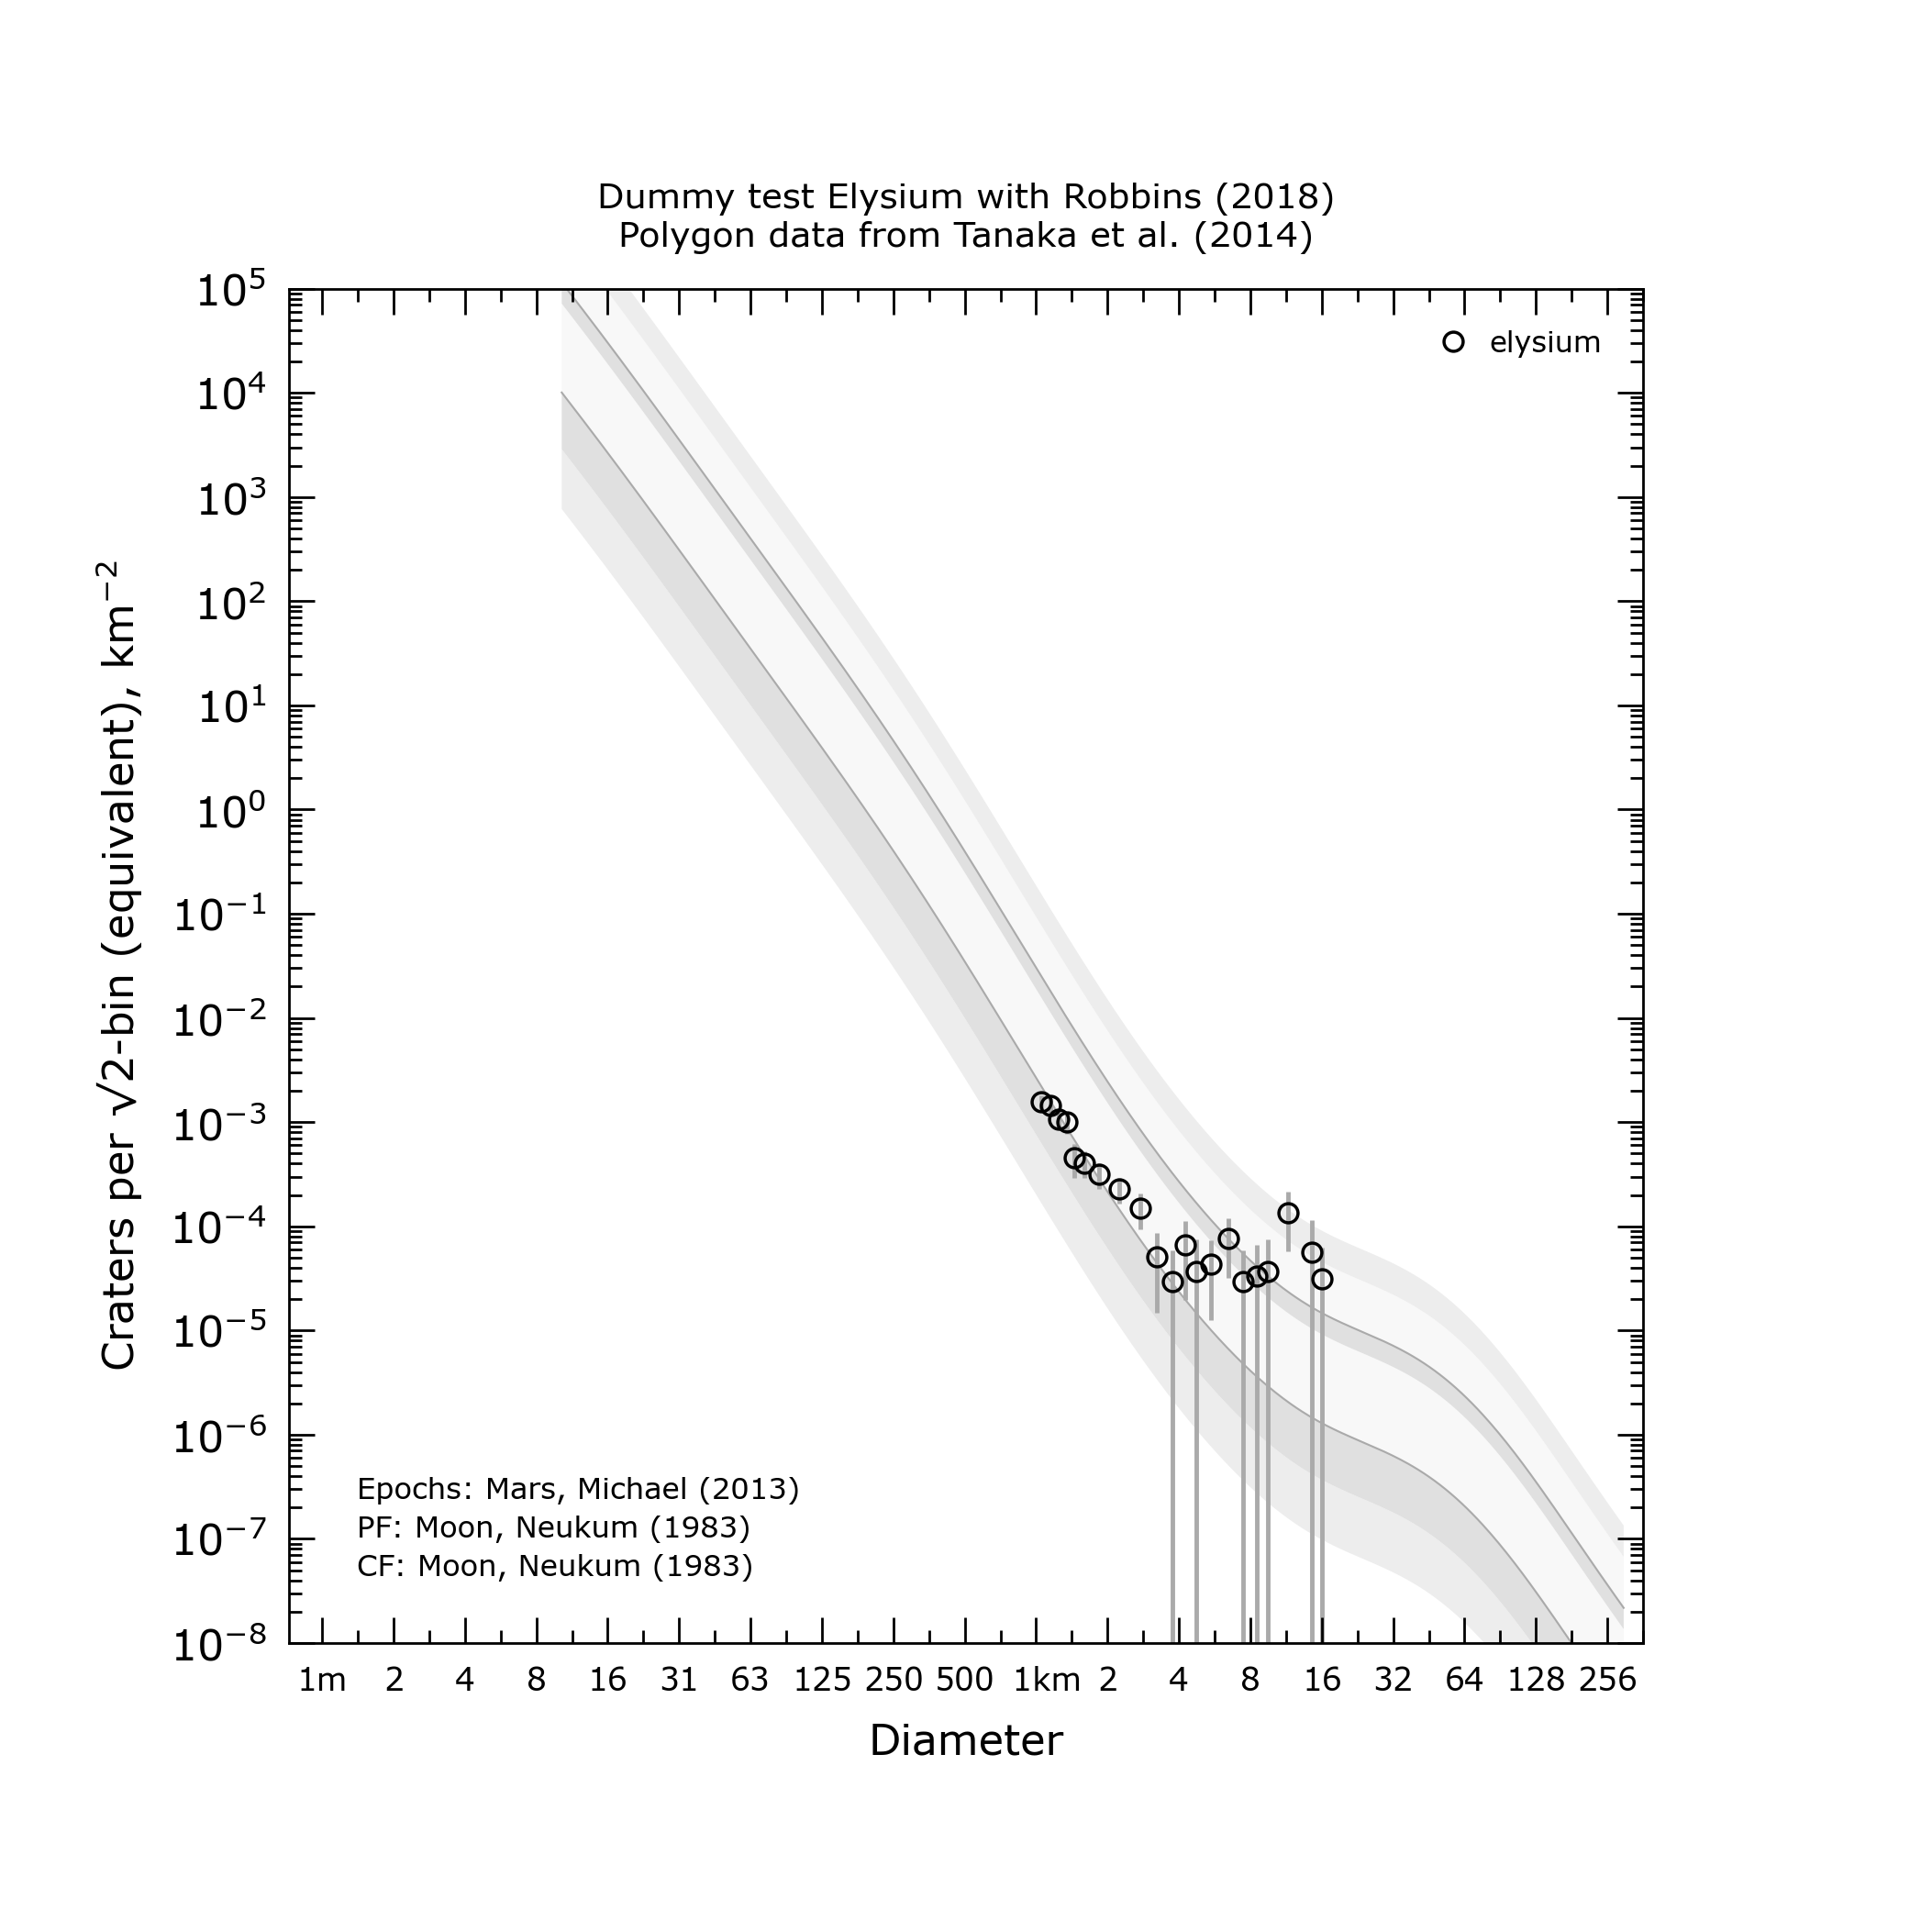

In [65]:
craterstats([
    "-pr",
    "hartmann",
    "-ep",
    "mars",
    # "-isochrons",
    # "100",
    "-legend",
    "nr",
    "-p",
    "source=../test/elysium.diam",
    "-title", 
    "Dummy test Elysium with Robbins (2018)",
    "-subtitle",
    "Polygon data from Tanaka et al. (2014)"])


from IPython import display
display.Image("./out.png", width=800)

# References

Fortezzo, C.M., Spudis, P. D. and Harrel, S. L. (2020). Release of the Digital Unified Global Geologic Map of the Moon At 1:5,000,000- Scale. Paper presented at the 51st Lunar and Planetary Science Conference, Lunar and Planetary Institute, Houston, TX. https://www.hou.usra.edu/meetings/lpsc2020/pdf/2760.pdf - https://astrogeology.usgs.gov/search/map/Moon/Geology/Unified_Geologic_Map_of_the_Moon_GIS_v2

Haber, T., Iqbal, W., Liu, T., Scherer, E. E., van der Bogert, C. H., & Hiesinger, H. (2022). A 4.15 Ga Age of Serenitatis or Crisium implied by the 207Pb/206Pb Systematics of Apollo Sample 77017. LPI Contributions, 2695, 6165. https://www.hou.usra.edu/meetings/metsoc2022/pdf/6165.pdf

Head, J. W., Adams, J. B., McCord, T. B., Pieters, C., & Zisk, S. (1978). Regional stratigraphy and geologic history of Mare Crisium. In Mare Crisium: The View from Luna 24 (pp. 43-74). https://articles.adsabs.harvard.edu/pdf/1978mcvl.conf...43H 

Hiesinger, H., Jaumann, R., Neukum, G., & Head III, J. W. (2000). Ages of mare basalts on the lunar nearside. Journal of Geophysical Research: Planets, 105(E12), 29239-29275. https://doi.org/10.1029/2000JE001244

Hiesinger, H., van der Bogert, C. H., Reiss, D., & Robinson, M. S. (2011, March). Crater size-frequency distribution measurements of mare crisium. In 42nd Annual Lunar and Planetary Science Conference (No. 1608, p. 2179). https://www.lpi.usra.edu/meetings/lpsc2011/pdf/2179.pdf

Lagain, A., Bouley, S., Baratoux, D., Marmo, C., Costard, F., Delaa, O., Rossi, A. P., Minin, M., Benedix, G.K., Ciocco, M. Bedos, B., Guimpier, A., Dehouck, E., Loizeau, D., Bouquety, A., Zhao, J., Vialatte, A., et al. (2021) “Mars Crater Database: A Participative Project for the Classification of the Morphological Characteristics of Large Martian Craters.” In Large Meteorite Impacts and Planetary Evolution VI, edited by Wolf Uwe Reimold and Christian Koeberl, 629–44. Geological Society of America. DOI: 10.1130/2021.2550(29). - https://doi.org/10.1130/2021.2550(29)

Michael, G. G. (2021, June). Planetary Surface Dating with Craterstats3—A New Open Source Implementation in Python. In 5th Planetary Data Workshop & Planetary Science Informatics & Analytics (Vol. 2549, p. 7045)  https://www.hou.usra.edu/meetings/planetdata2021/pdf/7045.pdf

Platz, T., & Michael, G. (2011). Eruption history of the Elysium volcanic province, Mars. Earth and Planetary Science Letters, 312(1-2), 140-151. https://doi.org/10.1016/j.epsl.2011.10.001

Runyon, K. D., Moriarty III, D. P., Denevi, B. W., Greenhagen, B. T., Morgan, G., Young, K. E., ... & Jozwiak, L. M. (2020). Impact Melt facies in the Moon's Crisium basin: Identifying, characterizing, and future radiogenic dating. Journal of Geophysical Research: Planets, 125(1), e2019JE006024 - https://doi.org/10.1029/2019JE006024

Tanaka, K.L., Skinner, J.A., Jr., Dohm, J.M., Irwin, R.P., III, Kolb, E.J., Fortezzo, C.M., Platz, T., Michael, G.G., and Hare, T.M., 2014, Geologic map of Mars: U.S. Geological Survey Scientific Investigations Map 3292, scale 1:20,000,000, pamphlet 43 p., https://dx.doi.org/10.3133/sim3292 - https://pubs.usgs.gov/sim/3292/

Van der Bogert, C. H., Hiesinger, H., & Spudis, P. (2017). The age of the crisium impact basin. New Views of the Moon 2-Europe, 1988, 6009 https://www.hou.usra.edu/meetings/newviews2017/pdf/6009.pdf.

Wang, Y., Wu, B., Xue, H., Li, X., & Ma, J. (2021). An improved global catalog of lunar impact craters (≥1 km) with 3D morphometric information and updates on global crater analysis. Journal of Geophysical Research: Planets, 126, e2020JE006728. - https://doi.org/10.1029/2020JE006728